## Emotion Detection in Text using Deep Learning

### Data Visualization

In [ ]:
import pandas as pd
import matplotlib
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# read dataset
# we will be using trained dataset to understand how people are reacting
data_train = pd.read_csv('/content/drive/MyDrive/it809/data_train.csv', encoding='utf-8')
data_test = pd.read_csv('/content/drive/MyDrive/it809/data_test.csv', encoding='utf-8')
data = data_train.append(data_test, ignore_index=True)
data.head()

,Emotion,Text
0,neutral,There are tons of other paintings that I thin...
1,sadness,"Yet the dog had grown old and less capable , a..."
2,fear,When I get into the tube or the train without ...
3,fear,This last may be a source of considerable disq...
4,anger,She disliked the intimacy he showed towards so...


In [ ]:
#basic stats
data.describe()

,Emotion,Text
count,11327,11327
unique,5,10272
top,joy,Yes .
freq,2326,76


In [ ]:
print(data.Emotion.value_counts())

joy        2326
sadness    2317
anger      2259
neutral    2254
fear       2171
Name: Emotion, dtype: int64


In [ ]:
freqs = {
"fear":2171,
"joy":2326,
"sadness":2371,
"neural":2254,
"anger":2259}

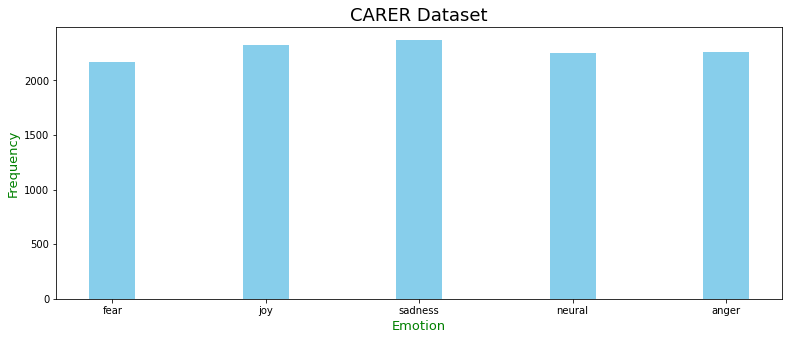

In [ ]:
#plot class distribution
plt.rcParams['figure.figsize'] = [13, 5]
plt.bar(freqs.keys(), freqs.values(), width=0.3,color='skyblue')
t = plt.title("CARER Dataset", fontsize=18)
x = plt.xlabel("Emotion", fontsize=13)
x.set_color('g')
y = plt.ylabel("Frequency", fontsize=13)
y.set_color('g')
plt.savefig('class_distribution.png')
plt.show()

In [ ]:
# Explore vocabulary
import collections
from tqdm import tqdm
data_text = data["Text"]
# Create a counter object for each dataset
word_counter = collections.Counter([word for sentence in tqdm(data_text, total=len(data_text)) \
                                                              for word in sentence.split()])

print('{} words.'.format(len([word for sentence in data_text for word in sentence.split()])))
print('{} unique words.'.format(len(word_counter)))
print('10 Most common words in the dataset:')
print('"' + '" "'.join(list(zip(*word_counter.most_common(10)))[0]) + '"')

100%|██████████| 11327/11327 [00:00<00:00, 296780.26it/s]

193097 words.
18150 unique words.
10 Most common words in the dataset:
"I" "." "the" "a" "to" "and" "was" "," "of" "my"


#### Train Visualization

In [ ]:
#basic stats
data_train.describe()

,Emotion,Text
count,7934,7934
unique,5,7265
top,sadness,Yes .
freq,1641,58


In [ ]:
print(data_train.Emotion.value_counts())

sadness    1641
joy        1619
neutral    1616
anger      1566
fear       1492
Name: Emotion, dtype: int64


In [ ]:
freqs = {
"fear":1492,
"joy":1619,
"sadness":1641,
"neural":1616,
"anger":1566}

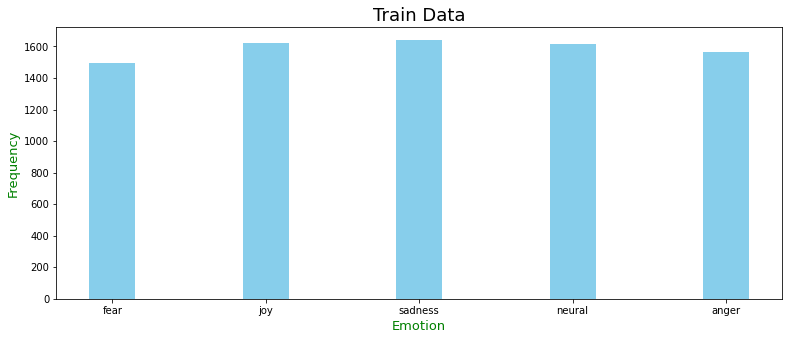

In [ ]:
#plot class distribution
plt.rcParams['figure.figsize'] = [13, 5]
plt.bar(freqs.keys(), freqs.values(), width=0.3,color='skyblue')
t = plt.title("Train Data", fontsize=18)
x = plt.xlabel("Emotion", fontsize=13)
x.set_color('g')
y = plt.ylabel("Frequency", fontsize=13)
y.set_color('g')
plt.savefig('class_distribution.png')
plt.show()

In [ ]:
# Explore vocabulary
import collections
from tqdm import tqdm
data_text = data_train["Text"]
# Create a counter object for each dataset
word_counter = collections.Counter([word for sentence in tqdm(data_text, total=len(data_text)) \
                                                              for word in sentence.split()])

print('{} words.'.format(len([word for sentence in data_text for word in sentence.split()])))
print('{} unique words.'.format(len(word_counter)))
print('10 Most common words in the dataset:')
print('"' + '" "'.join(list(zip(*word_counter.most_common(10)))[0]) + '"')

100%|██████████| 7934/7934 [00:00<00:00, 373012.99it/s]

135343 words.
14597 unique words.
10 Most common words in the dataset:
"I" "." "the" "to" "a" "and" "was" "," "of" "my"


#### Test Visualization

In [ ]:
#basic stats
data_test.describe()

,Emotion,Text
count,3393,3393
unique,5,3202
top,joy,Why ?
freq,707,21


In [ ]:
print(data_test.Emotion.value_counts())

joy        707
anger      693
fear       679
sadness    676
neutral    638
Name: Emotion, dtype: int64


In [ ]:
freqs = {
"fear":679,
"joy":707,
"sadness":676,
"neural":638,
"anger":693}

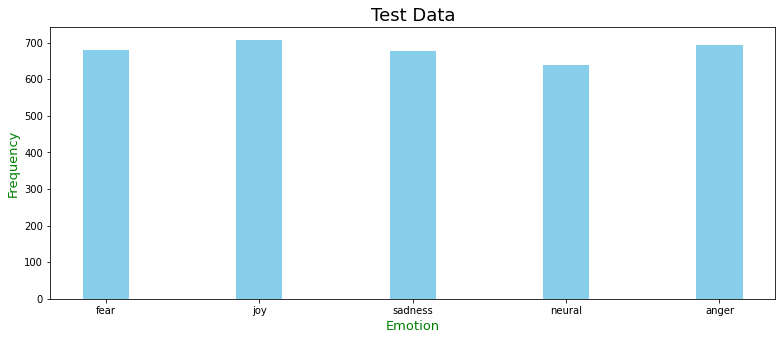

In [ ]:
#plot class distribution
plt.rcParams['figure.figsize'] = [13, 5]
plt.bar(freqs.keys(), freqs.values(), width=0.3,color='skyblue')
t = plt.title("Test Data", fontsize=18)
x = plt.xlabel("Emotion", fontsize=13)
x.set_color('g')
y = plt.ylabel("Frequency", fontsize=13)
y.set_color('g')
plt.savefig('class_distribution.png')
plt.show()

In [ ]:
# Explore vocabulary
import collections
from tqdm import tqdm
data_text = data_test["Text"]
# Create a counter object for each dataset
word_counter = collections.Counter([word for sentence in tqdm(data_text, total=len(data_text)) \
                                                              for word in sentence.split()])

print('{} words.'.format(len([word for sentence in data_text for word in sentence.split()])))
print('{} unique words.'.format(len(word_counter)))
print('10 Most common words in the dataset:')
print('"' + '" "'.join(list(zip(*word_counter.most_common(10)))[0]) + '"')

100%|██████████| 3393/3393 [00:00<00:00, 273836.32it/s]

57754 words.
8579 unique words.
10 Most common words in the dataset:
"I" "." "the" "a" "to" "and" "," "was" "of" "my"


## Emotion Detection in text using CNN


## Workflow: 
1. Import Data
2. Prepare the input data
3. Import pre-trained W2V
4. Create Neural Network Pipeline
5. Train The Model
6. Evaluate results

## 1. Import Data

In [ ]:
import pandas as pd
import numpy as np

# text preprocessing
from nltk.tokenize import word_tokenize
import re

# plots and metrics
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, recall_score, precision_score
from keras.optimizers import Nadam

# preparing input to our model
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical

# keras layers
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, MaxPooling1D, BatchNormalization, Dropout

In [ ]:
#Defining vector space dimension and fixed input size
# Number of labels: joy, anger, fear, sadness, neutral
num_classes = 5

# Number of dimensions for word embedding
embed_num_dims = 300

class_names = ['joy', 'fear', 'anger', 'sadness', 'neutral']

In [ ]:
#Importing our training and testing datasets
data_train = pd.read_csv('/content/drive/MyDrive/it809/data_train.csv', encoding='utf-8')
data_test = pd.read_csv('/content/drive/MyDrive/it809/data_test.csv', encoding='utf-8')

X_train = data_train.Text
X_test = data_test.Text

y_train = data_train.Emotion
y_test = data_test.Emotion

data = data_train.append(data_test, ignore_index=True)

## 2. Prepare input data
To input the data to our NN Model we'll need some preprocessing:
1. Tokenize our texts and count unique tokens
2. Padding: each input (sentence or text) has to be of the same lenght
3. Labels have to be converted to integers and categorized

Basic preprocessing and tokenization using nltk to double check that sentences are properly split into words.
We could also add stopword removal but steps like stemming or lemmatization are not needed since we are using word2vec and words with the same stem can have a different meaning. For example, bat. Bat may mean the animal in horror movies, or the act of hitting a ball to one of America’s darling sports. These two senses, or meanings of bat are assigned to various lexical units.

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
def clean_text(data):
    
    # remove @usernames
    data = re.sub(r"(@[\d\w\.]+)", '', data)
    
    # tekenization using nltk
    data = word_tokenize(data)
    
    return data

In [ ]:
texts = [' '.join(clean_text(text)) for text in data.Text]
texts_train = [' '.join(clean_text(text)) for text in X_train]
texts_test = [' '.join(clean_text(text)) for text in X_test]

In [ ]:
print(texts_train[92])

a bit ? I 'm extremely annoyed that he did n't phone me when he promised me that he would ! He 's such a liar .


We preprocess our data a bit so that it's in a format we can input into a neural network. The process includes:

1. Remove irrelevant characters (!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n).
2. Convert all letters to lowercase (HeLlO -> hello).
3. Tokenize our words (hi how are you -> [23, 1, 5, 13]).
4. Standaridize our input length with padding (hi how are you -> [23, 1, 5, 13, 0, 0, 0]).

We can go further and consider combining misspelled, slang, or different word inflections into single base words. However, the benefit of using a neural network is that they do well with raw input, so we'll stick with what we have listed.

In [ ]:
#Tokenization + fitting using keras
tokenizer = Tokenizer(num_words=None,
                      filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',
                      lower=True,
                      split=" ",
                      char_level=False)
tokenizer.fit_on_texts(texts)

sequence_train = tokenizer.texts_to_sequences(texts_train)
sequence_test = tokenizer.texts_to_sequences(texts_test)

index_of_words = tokenizer.word_index

# vacab size is number of unique words + reserved 0 index for padding
vocab_size = len(index_of_words) + 1

# Extract variables
print('Vocab size: {}'.format(vocab_size))
longest = max(len(seq) for seq in sequence_train)
print("Longest comment size: {}".format(longest))
average = np.mean([len(seq) for seq in sequence_train])
print("Average comment size: {}".format(average))
stdev = np.std([len(seq) for seq in sequence_train])
print("Stdev of comment size: {}".format(stdev))
max_len = int(average + stdev * 3)
print('Max comment size: {}'.format(max_len))

Vocab size: 12199
Longest comment size: 235
Average comment size: 16.198008570708343
Stdev of comment size: 13.375809032425684
Max comment size: 56


**Padding** -> each input has the same length

We defined maximun number of words for our texts and input size to our model has to be fixed - padding with zeros to keep the same input lenght (longest input in our dataset is ~235 words)

In [ ]:
X_train_pad = pad_sequences(sequence_train, maxlen = 500 )
X_test_pad = pad_sequences(sequence_test, maxlen = 500 )
data_t = data_train["Text"]
for sample_i, (sent, token_sent) in enumerate(zip(data_t[:2], sequence_train[:2])):
    print('Sequence {}'.format(sample_i + 1))
    print('  Input:  {}'.format(sent))
    print('  Output: {}'.format(token_sent))

Sequence 1
  Input:   There are tons of other paintings that I think are better . 
  Output: [57, 51, 5956, 8, 132, 3306, 11, 1, 119, 51, 345]
Sequence 2
  Input:  Yet the dog had grown old and less capable , and one day the gillie had come and explained with great sorrow that the dog had suffered a stroke , and must be put down . 
  Output: [420, 2, 312, 14, 1469, 168, 5, 575, 2372, 5, 45, 75, 2, 5957, 14, 138, 5, 2092, 18, 180, 847, 11, 2, 312, 14, 818, 3, 1713, 5, 284, 37, 277, 154]


**Categorize** labels: 

In [ ]:
encoding = {
    'joy': 0,
    'fear': 1,
    'anger': 2,
    'sadness': 3,
    'neutral': 4
}

# Integer labels
y_train = [encoding[x] for x in data_train.Emotion]
y_test = [encoding[x] for x in data_test.Emotion]

In [ ]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

y_train

array([[0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.]], dtype=float32)

## 2. Import pretrained word vectors
* Importing pretrained word2vec from file and creating embedding matrix
* We will later map each word in our corpus to existing word vector

In [ ]:
def create_embedding_matrix(filepath, word_index, embedding_dim):
    vocab_size = len(word_index) + 1  # Adding again 1 because of reserved 0 index
    embedding_matrix = np.zeros((vocab_size, embedding_dim))
    with open(filepath) as f:
        for line in f:
            word, *vector = line.split()
            if word in word_index:
                idx = word_index[word] 
                embedding_matrix[idx] = np.array(
                    vector, dtype=np.float32)[:embedding_dim]
    return embedding_matrix

You can download and import any pre-trained word embeddings. I will use 300 dimentional w2v pre-trained on wikipedia articles. Download fast text english vectors: https://fasttext.cc/docs/en/english-vectors.html

In [ ]:
import urllib.request
import zipfile
import os

fname = 'embeddings/wiki-news-300d-1M.vec'

if not os.path.isfile(fname):
    print('Downloading word vectors...')
    urllib.request.urlretrieve('https://dl.fbaipublicfiles.com/fasttext/vectors-english/wiki-news-300d-1M.vec.zip',
                              'wiki-news-300d-1M.vec.zip')
    print('Unzipping...')
    with zipfile.ZipFile('wiki-news-300d-1M.vec.zip', 'r') as zip_ref:
        zip_ref.extractall('embeddings')
    print('done.')
    
    os.remove('wiki-news-300d-1M.vec.zip')

Unzipping...
done.


In [ ]:
embedd_matrix = create_embedding_matrix(fname, index_of_words, embed_num_dims)
embedd_matrix.shape

(12199, 300)

Some of the words from our corpus were not included in the pre-trained word vectors. If we inspect those words we'll see that it's mostly spelling errors. 

In [ ]:
# Inspect unseen words
new_words = 0

for word in index_of_words:
    entry = embedd_matrix[index_of_words[word]]
    if all(v == 0 for v in entry):
        new_words = new_words + 1

print('Words found in wiki vocab: ' + str(len(index_of_words) - new_words))
print('New words found: ' + str(new_words))

Words found in wiki vocab: 11490
New words found: 708


## 3. Create CNN Pipeline
### Embedding Layer

We will use pre-trained word vectors. We could also train our own embedding layer if we don't specify the pre-trained weights 

* **vocabulary size:** the maximum number of terms that are used to represent a text: e.g. if we set the size of the “vocabulary” to 1000 only the first thousand terms most frequent in the corpus will be considered (and the other terms will be ignored)
* **the maximum length:** of the texts (which must all be the same length)
* **size of embeddings:** basically, the more dimensions we have the more precise the semantics will be, but beyond a certain threshold we will lose the ability of the embedding to define a coherent and general enough semantic area
* **trainable:** True if you want to fine-tune them while training


In [ ]:
embedd_layer = Embedding(vocab_size,
                         embed_num_dims,
                         input_length = 500,
                         weights = [embedd_matrix],
                         trainable=False)

### Model Pipeline
- the input is the first N words of each text (with proper padding)
- the first level creates embedding of words, using vocabulary with a certain dimension, and a given size of embeddings
- we will use 1D convolutional neural network to extract features from our data. The result of each convolution will fire when a special pattern is detected. By varying the size of the kernels and concatenating their outputs, you’re allowing yourself to detect patterns of multiples sizes (2, 3, or 5 adjacent words)
- the output level has a number of neurons equal to the classes of the problem and a “softmax” activation function

In [ ]:
# Convolution

model = Sequential()
model.add(embedd_layer)
# Add Convolutional layer
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(3))
model.add(GlobalMaxPooling1D())
model.add(BatchNormalization())

# Add fully connected layers
model.add(Dense(30, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

# Summarize the model
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 500, 300)          3659700   
_________________________________________________________________
conv1d_7 (Conv1D)            (None, 500, 32)           28832     
_________________________________________________________________
max_pooling1d_7 (MaxPooling1 (None, 166, 32)           0         
_________________________________________________________________
global_max_pooling1d_7 (Glob (None, 32)                0         
_________________________________________________________________
batch_normalization_7 (Batch (None, 32)                128       
_________________________________________________________________
dense_15 (Dense)             (None, 30)                990       
_________________________________________________________________
dropout_7 (Dropout)          (None, 30)               

#### Compile the model
We'll be using binary crossentropy as our loss function and clipping our gradients to avoid any explosions.

In [ ]:
model.compile(loss = 'categorical_crossentropy', optimizer = Nadam(lr=0.0001, clipnorm=1.0), metrics = ['accuracy'])

## 3. Train the Model

In [ ]:
batch_size = 64
epochs = 30

hist = model.fit(X_train_pad, y_train, 
                 batch_size=batch_size,
                 epochs=epochs,
                 validation_data=(X_test_pad,y_test))

Epoch 1/30
124/124 [==============================] - 27s 204ms/step - loss: 1.9604 - accuracy: 0.2185 - val_loss: 1.5643 - val_accuracy: 0.3207
Epoch 2/30
124/124 [==============================] - 25s 202ms/step - loss: 1.6443 - accuracy: 0.3077 - val_loss: 1.4782 - val_accuracy: 0.3758
Epoch 3/30
124/124 [==============================] - 25s 202ms/step - loss: 1.5466 - accuracy: 0.3403 - val_loss: 1.3959 - val_accuracy: 0.4061
Epoch 4/30
124/124 [==============================] - 25s 203ms/step - loss: 1.4486 - accuracy: 0.3777 - val_loss: 1.3392 - val_accuracy: 0.4318
Epoch 5/30
124/124 [==============================] - 25s 202ms/step - loss: 1.3914 - accuracy: 0.4060 - val_loss: 1.3039 - val_accuracy: 0.4559
Epoch 6/30
124/124 [==============================] - 25s 205ms/step - loss: 1.3516 - accuracy: 0.4224 - val_loss: 1.2731 - val_accuracy: 0.4745
Epoch 7/30
124/124 [==============================] - 26s 206ms/step - loss: 1.2962 - accuracy: 0.4670 - val_loss: 1.2440 - val_ac

## 4. Evaluation

In [ ]:
predictions = model.predict(X_test_pad)
predictions = np.argmax(predictions, axis=1)
predictions = [class_names[pred] for pred in predictions]

In [ ]:
print("Accuracy: {:.4f}%".format(accuracy_score(data_test.Emotion, predictions) * 100))
print("\nF1 Score: {:.4f}".format(f1_score(data_test.Emotion, predictions, average='macro') * 100))
print("\nRecall Score: {:.4f}".format(recall_score(data_test.Emotion, predictions, average='macro') * 100))
print("\nPrecision Score: {:.4f}".format(precision_score(data_test.Emotion, predictions, average='macro') * 100))

Accuracy: 67.4330%

F1 Score: 67.4156

Recall Score: 67.6278

Precision Score: 67.3700


In [ ]:
print(f1_score(data_test.Emotion, predictions, average=None) * 100)
print(recall_score(data_test.Emotion, predictions, average=None) * 100)
print(precision_score(data_test.Emotion, predictions, average=None) * 100)

[62.46 69.39 65.46 73.99 65.78]
[60.03 69.96 63.79 78.68 65.68]
[65.1  68.84 67.21 69.82 65.88]


#### Plotting confusion Matrix:

In [ ]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    '''
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    '''
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    fig, ax = plt.subplots()
    
    # Set size
    fig.set_size_inches(12.5, 7.5)
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.grid(False)
    
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

#### Let's try other inputs:

In [ ]:
import time
message = ['I lost my job!']

seq = tokenizer.texts_to_sequences(message)
padded = pad_sequences(seq, maxlen=500)

start_time = time.time()
pred = model.predict(padded)

print('Message: ' + str(message))
print('predicted: {} ({:.2f} seconds)'.format(class_names[np.argmax(pred)], (time.time() - start_time)))

Message: ['I lost my job!']
predicted: sadness (0.06 seconds)


### Done
Save the model for later use

In [ ]:
# creates a HDF5 file 'my_model.h5'
model.save('models/cnn_w2v.h5')

In [ ]:
from keras.models import load_model
predictor = load_model('models/cnn_w2v.h5')

### Hyper parameter tuning for CNN

In [ ]:
# Convolution

model = Sequential()
model.add(embedd_layer)
# Add Convolutional layer
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(3))
model.add(GlobalMaxPooling1D())
model.add(BatchNormalization())

# Add fully connected layers
model.add(Dense(30, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

# Summarize the model
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 500, 300)          3659700   
_________________________________________________________________
conv1d_6 (Conv1D)            (None, 500, 32)           28832     
_________________________________________________________________
max_pooling1d_6 (MaxPooling1 (None, 166, 32)           0         
_________________________________________________________________
global_max_pooling1d_6 (Glob (None, 32)                0         
_________________________________________________________________
batch_normalization_6 (Batch (None, 32)                128       
_________________________________________________________________
dense_13 (Dense)             (None, 30)                990       
_________________________________________________________________
dropout_6 (Dropout)          (None, 30)               

In [ ]:
model.compile(loss = 'categorical_crossentropy', optimizer = Nadam(lr=0.0001, clipnorm=1.0), metrics = ['accuracy'])

In [ ]:
batch_size = 32
epochs = 30

hist = model.fit(X_train_pad, y_train, 
                 batch_size=batch_size,
                 epochs=epochs,
                 validation_data=(X_test_pad,y_test))

Epoch 1/30
248/248 [==============================] - 28s 107ms/step - loss: 1.9725 - accuracy: 0.2064 - val_loss: 1.5173 - val_accuracy: 0.3581
Epoch 2/30
248/248 [==============================] - 26s 106ms/step - loss: 1.5960 - accuracy: 0.3428 - val_loss: 1.3819 - val_accuracy: 0.4082
Epoch 3/30
248/248 [==============================] - 26s 105ms/step - loss: 1.4648 - accuracy: 0.3837 - val_loss: 1.3149 - val_accuracy: 0.4427
Epoch 4/30
248/248 [==============================] - 26s 105ms/step - loss: 1.3865 - accuracy: 0.4190 - val_loss: 1.2658 - val_accuracy: 0.4783
Epoch 5/30
248/248 [==============================] - 26s 104ms/step - loss: 1.3053 - accuracy: 0.4568 - val_loss: 1.2248 - val_accuracy: 0.5025
Epoch 6/30
248/248 [==============================] - 26s 104ms/step - loss: 1.2855 - accuracy: 0.4810 - val_loss: 1.1820 - val_accuracy: 0.5323
Epoch 7/30
248/248 [==============================] - 26s 104ms/step - loss: 1.1777 - accuracy: 0.5243 - val_loss: 1.1418 - val_ac

In [ ]:
predictions = model.predict(X_test_pad)
predictions = np.argmax(predictions, axis=1)
predictions = [class_names[pred] for pred in predictions]

In [ ]:
print("Accuracy: {:.4f}%".format(accuracy_score(data_test.Emotion, predictions) * 100))
print("\nF1 Score: {:.4f}".format(f1_score(data_test.Emotion, predictions, average='macro') * 100))
print("\nRecall Score: {:.4f}".format(recall_score(data_test.Emotion, predictions, average='macro') * 100))
print("\nPrecision Score: {:.4f}".format(precision_score(data_test.Emotion, predictions, average='macro') * 100))

Accuracy: 68.8771%

F1 Score: 68.9556

Recall Score: 68.9783

Precision Score: 69.0014


In [ ]:
print(f1_score(data_test.Emotion, predictions, average=None) * 100)
print(recall_score(data_test.Emotion, predictions, average=None) * 100)
print(precision_score(data_test.Emotion, predictions, average=None) * 100)

[63.68 71.85 69.8  73.89 65.55]
[63.49 69.37 69.31 75.86 66.86]
[63.86 74.53 70.3  72.02 64.3 ]


In [ ]:
model.save('models/h1_cnn_w2v.h5')

In [ ]:
# Convolution

model = Sequential()
model.add(embedd_layer)
# Add Convolutional layer
model.add(Conv1D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(3))
model.add(GlobalMaxPooling1D())
model.add(BatchNormalization())

# Add fully connected layers
model.add(Dense(30, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

# Summarize the model
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 500, 300)          3659700   
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 500, 64)           57664     
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, 166, 64)           0         
_________________________________________________________________
global_max_pooling1d_4 (Glob (None, 64)                0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 64)                256       
_________________________________________________________________
dense_9 (Dense)              (None, 30)                1950      
_________________________________________________________________
dropout_4 (Dropout)          (None, 30)               

In [ ]:
model.compile(loss = 'categorical_crossentropy', optimizer = Nadam(lr=0.0001, clipnorm=1.0), metrics = ['accuracy'])

In [ ]:
batch_size = 32
epochs = 30

hist = model.fit(X_train_pad, y_train, 
                 batch_size=batch_size,
                 epochs=epochs,
                 validation_data=(X_test_pad,y_test))

Epoch 1/30
248/248 [==============================] - 35s 135ms/step - loss: 1.9427 - accuracy: 0.2679 - val_loss: 1.4490 - val_accuracy: 0.3873
Epoch 2/30
248/248 [==============================] - 33s 134ms/step - loss: 1.5442 - accuracy: 0.3540 - val_loss: 1.3243 - val_accuracy: 0.4409
Epoch 3/30
248/248 [==============================] - 33s 134ms/step - loss: 1.3881 - accuracy: 0.4309 - val_loss: 1.2546 - val_accuracy: 0.4934
Epoch 4/30
248/248 [==============================] - 33s 135ms/step - loss: 1.2918 - accuracy: 0.4700 - val_loss: 1.1878 - val_accuracy: 0.5373
Epoch 5/30
248/248 [==============================] - 34s 135ms/step - loss: 1.2030 - accuracy: 0.5103 - val_loss: 1.1313 - val_accuracy: 0.5641
Epoch 6/30
248/248 [==============================] - 34s 136ms/step - loss: 1.1316 - accuracy: 0.5480 - val_loss: 1.0733 - val_accuracy: 0.5883
Epoch 7/30
248/248 [==============================] - 33s 135ms/step - loss: 1.0719 - accuracy: 0.5922 - val_loss: 1.0331 - val_ac

In [ ]:
predictions = model.predict(X_test_pad)
predictions = np.argmax(predictions, axis=1)
predictions = [class_names[pred] for pred in predictions]

In [ ]:
print("Accuracy: {:.4f}%".format(accuracy_score(data_test.Emotion, predictions) * 100))
print("\nF1 Score: {:.4f}".format(f1_score(data_test.Emotion, predictions, average='macro') * 100))
print("\nRecall Score: {:.4f}".format(recall_score(data_test.Emotion, predictions, average='macro') * 100))
print("\nPrecision Score: {:.4f}".format(precision_score(data_test.Emotion, predictions, average='macro') * 100))

Accuracy: 69.2308%

F1 Score: 69.2933

Recall Score: 69.3322

Precision Score: 69.2960


In [ ]:
print(f1_score(data_test.Emotion, predictions, average=None) * 100)
print(recall_score(data_test.Emotion, predictions, average=None) * 100)
print(precision_score(data_test.Emotion, predictions, average=None) * 100)

[63.23 70.91 72.09 75.   65.24]
[63.64 69.66 70.86 77.12 65.38]
[62.82 72.21 73.35 73.   65.1 ]


In [ ]:
model.save('models/h2_cnn_w2v.h5')

In [ ]:
# Convolution

model = Sequential()
model.add(embedd_layer)
# Add Convolutional layer
model.add(Conv1D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(3))
model.add(GlobalMaxPooling1D())
model.add(BatchNormalization())

# Add fully connected layers
model.add(Dense(30, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

# Summarize the model
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 500, 300)          3659700   
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 500, 64)           57664     
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 166, 64)           0         
_________________________________________________________________
global_max_pooling1d_3 (Glob (None, 64)                0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 64)                256       
_________________________________________________________________
dense_7 (Dense)              (None, 30)                1950      
_________________________________________________________________
dropout_3 (Dropout)          (None, 30)               

In [ ]:
model.compile(loss = 'categorical_crossentropy', optimizer = Nadam(lr=0.0001, clipnorm=1.0), metrics = ['accuracy'])

In [ ]:
batch_size = 64
epochs = 30

hist = model.fit(X_train_pad, y_train, 
                 batch_size=batch_size,
                 epochs=epochs,
                 validation_data=(X_test_pad,y_test))

Epoch 1/30
124/124 [==============================] - 34s 260ms/step - loss: 2.0437 - accuracy: 0.2206 - val_loss: 1.5474 - val_accuracy: 0.3513
Epoch 2/30
124/124 [==============================] - 32s 258ms/step - loss: 1.5958 - accuracy: 0.3362 - val_loss: 1.4452 - val_accuracy: 0.4079
Epoch 3/30
124/124 [==============================] - 32s 259ms/step - loss: 1.4389 - accuracy: 0.3908 - val_loss: 1.3413 - val_accuracy: 0.4565
Epoch 4/30
124/124 [==============================] - 32s 257ms/step - loss: 1.3504 - accuracy: 0.4395 - val_loss: 1.2604 - val_accuracy: 0.4884
Epoch 5/30
124/124 [==============================] - 32s 258ms/step - loss: 1.2726 - accuracy: 0.4824 - val_loss: 1.1964 - val_accuracy: 0.5302
Epoch 6/30
124/124 [==============================] - 32s 259ms/step - loss: 1.1929 - accuracy: 0.5192 - val_loss: 1.1455 - val_accuracy: 0.5570
Epoch 7/30
124/124 [==============================] - 32s 259ms/step - loss: 1.1463 - accuracy: 0.5459 - val_loss: 1.0996 - val_ac

In [ ]:
predictions = model.predict(X_test_pad)
predictions = np.argmax(predictions, axis=1)
predictions = [class_names[pred] for pred in predictions]

In [ ]:
print("Accuracy: {:.4f}%".format(accuracy_score(data_test.Emotion, predictions) * 100))
print("\nF1 Score: {:.4f}".format(f1_score(data_test.Emotion, predictions, average='macro') * 100))
print("\nRecall Score: {:.4f}".format(recall_score(data_test.Emotion, predictions, average='macro') * 100))
print("\nPrecision Score: {:.4f}".format(precision_score(data_test.Emotion, predictions, average='macro') * 100))

Accuracy: 68.2877%

F1 Score: 68.3315

Recall Score: 68.3778

Precision Score: 68.3294


In [ ]:
print(f1_score(data_test.Emotion, predictions, average=None) * 100)
print(recall_score(data_test.Emotion, predictions, average=None) * 100)
print(precision_score(data_test.Emotion, predictions, average=None) * 100)

[63.71 69.03 70.45 75.15 63.31]
[64.36 67.3  71.15 76.8  62.28]
[63.08 70.85 69.76 73.57 64.37]


In [ ]:
model.save('models/h3_cnn_w2v.h5')

In [ ]:
# Convolution

model = Sequential()
model.add(embedd_layer)
# Add Convolutional layer
model.add(Conv1D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(3))
model.add(GlobalMaxPooling1D())
model.add(BatchNormalization())

# Add fully connected layers
model.add(Dense(20, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

# Summarize the model
model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 500, 300)          3659700   
_________________________________________________________________
conv1d_13 (Conv1D)           (None, 500, 64)           57664     
_________________________________________________________________
max_pooling1d_13 (MaxPooling (None, 166, 64)           0         
_________________________________________________________________
global_max_pooling1d_13 (Glo (None, 64)                0         
_________________________________________________________________
batch_normalization_13 (Batc (None, 64)                256       
_________________________________________________________________
dense_27 (Dense)             (None, 20)                1300      
_________________________________________________________________
dropout_13 (Dropout)         (None, 20)              

In [ ]:
model.compile(loss = 'categorical_crossentropy', optimizer = Nadam(lr=0.0001, clipnorm=1.0), metrics = ['accuracy'])

In [ ]:
batch_size = 32
epochs = 30

hist = model.fit(X_train_pad, y_train, 
                 batch_size=batch_size,
                 epochs=epochs,
                 validation_data=(X_test_pad,y_test))

Epoch 1/30
248/248 [==============================] - 35s 135ms/step - loss: 2.0185 - accuracy: 0.2419 - val_loss: 1.4805 - val_accuracy: 0.3578
Epoch 2/30
248/248 [==============================] - 33s 134ms/step - loss: 1.5868 - accuracy: 0.3375 - val_loss: 1.3781 - val_accuracy: 0.4038
Epoch 3/30
248/248 [==============================] - 33s 134ms/step - loss: 1.4430 - accuracy: 0.3763 - val_loss: 1.3285 - val_accuracy: 0.4430
Epoch 4/30
248/248 [==============================] - 33s 134ms/step - loss: 1.3499 - accuracy: 0.4170 - val_loss: 1.2799 - val_accuracy: 0.4810
Epoch 5/30
248/248 [==============================] - 33s 134ms/step - loss: 1.2730 - accuracy: 0.4617 - val_loss: 1.2259 - val_accuracy: 0.5175
Epoch 6/30
248/248 [==============================] - 33s 134ms/step - loss: 1.2273 - accuracy: 0.5004 - val_loss: 1.1792 - val_accuracy: 0.5420
Epoch 7/30
248/248 [==============================] - 33s 134ms/step - loss: 1.1776 - accuracy: 0.5213 - val_loss: 1.1303 - val_ac

In [ ]:
predictions = model.predict(X_test_pad)
predictions = np.argmax(predictions, axis=1)
predictions = [class_names[pred] for pred in predictions]

In [ ]:
print("Accuracy: {:.4f}%".format(accuracy_score(data_test.Emotion, predictions) * 100))
print("\nF1 Score: {:.4f}".format(f1_score(data_test.Emotion, predictions, average='macro') * 100))
print("\nRecall Score: {:.4f}".format(recall_score(data_test.Emotion, predictions, average='macro') * 100))
print("\nPrecision Score: {:.4f}".format(precision_score(data_test.Emotion, predictions, average='macro') * 100))

Accuracy: 69.2602%

F1 Score: 69.2615

Recall Score: 69.3646

Precision Score: 69.2811


In [ ]:
print(f1_score(data_test.Emotion, predictions, average=None) * 100)
print(recall_score(data_test.Emotion, predictions, average=None) * 100)
print(precision_score(data_test.Emotion, predictions, average=None) * 100)

[65.5  70.33 70.22 74.85 65.41]
[64.65 67.89 71.71 78.37 64.2 ]
[66.37 72.94 68.79 71.63 66.67]


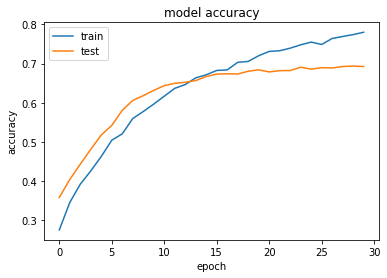

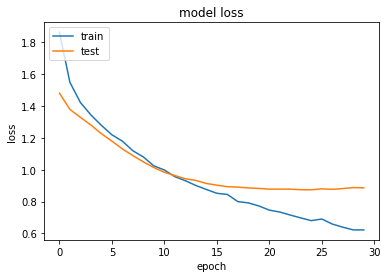

In [ ]:
# Accuracy plot
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Loss plot
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

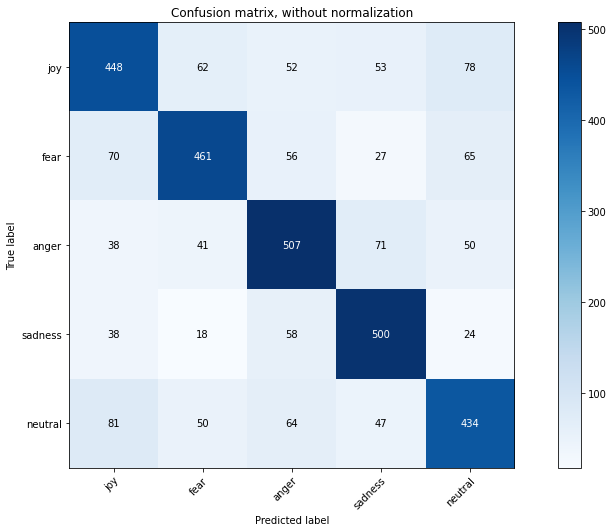

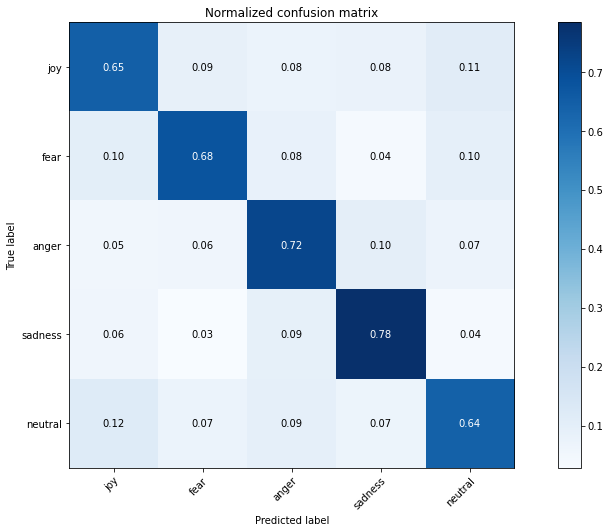

In [ ]:
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plot_confusion_matrix(data_test.Emotion, predictions, classes=class_names, title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plot_confusion_matrix(data_test.Emotion, predictions, classes=class_names, normalize=True, title='Normalized confusion matrix')

plt.show()

In [ ]:
model.save('models/h4_cnn_w2v.h5')

In [ ]:
# Convolution

model = Sequential()
model.add(embedd_layer)
# Add Convolutional layer
model.add(Conv1D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(2))
model.add(GlobalMaxPooling1D())
model.add(BatchNormalization())

# Add fully connected layers
model.add(Dense(20, activation='relu'))
model.add(Dropout(0.6))
model.add(Dense(num_classes, activation='softmax'))

# Summarize the model
model.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 500, 300)          3659700   
_________________________________________________________________
conv1d_19 (Conv1D)           (None, 500, 64)           57664     
_________________________________________________________________
max_pooling1d_19 (MaxPooling (None, 250, 64)           0         
_________________________________________________________________
global_max_pooling1d_19 (Glo (None, 64)                0         
_________________________________________________________________
batch_normalization_19 (Batc (None, 64)                256       
_________________________________________________________________
dense_39 (Dense)             (None, 20)                1300      
_________________________________________________________________
dropout_19 (Dropout)         (None, 20)              

In [ ]:
model.compile(loss = 'categorical_crossentropy', optimizer = Nadam(lr=0.0001, clipnorm=1.0), metrics = ['accuracy'])

In [ ]:
batch_size = 32
epochs = 30

hist = model.fit(X_train_pad, y_train, 
                 batch_size=batch_size,
                 epochs=epochs,
                 validation_data=(X_test_pad,y_test))

Epoch 1/30
248/248 [==============================] - 36s 138ms/step - loss: 2.2207 - accuracy: 0.2141 - val_loss: 1.5201 - val_accuracy: 0.3711
Epoch 2/30
248/248 [==============================] - 34s 138ms/step - loss: 1.6402 - accuracy: 0.3237 - val_loss: 1.3372 - val_accuracy: 0.4533
Epoch 3/30
248/248 [==============================] - 34s 138ms/step - loss: 1.4973 - accuracy: 0.3715 - val_loss: 1.2443 - val_accuracy: 0.5052
Epoch 4/30
248/248 [==============================] - 34s 138ms/step - loss: 1.3828 - accuracy: 0.4159 - val_loss: 1.1803 - val_accuracy: 0.5435
Epoch 5/30
248/248 [==============================] - 34s 138ms/step - loss: 1.2829 - accuracy: 0.4732 - val_loss: 1.1179 - val_accuracy: 0.5765
Epoch 6/30
248/248 [==============================] - 34s 139ms/step - loss: 1.2250 - accuracy: 0.4882 - val_loss: 1.0807 - val_accuracy: 0.5992
Epoch 7/30
248/248 [==============================] - 34s 139ms/step - loss: 1.1722 - accuracy: 0.5113 - val_loss: 1.0292 - val_ac

In [ ]:
predictions = model.predict(X_test_pad)
predictions = np.argmax(predictions, axis=1)
predictions = [class_names[pred] for pred in predictions]

In [ ]:
print("Accuracy: {:.4f}%".format(accuracy_score(data_test.Emotion, predictions) * 100))
print("\nF1 Score: {:.4f}".format(f1_score(data_test.Emotion, predictions, average='macro') * 100))
print("\nRecall Score: {:.4f}".format(recall_score(data_test.Emotion, predictions, average='macro') * 100))
print("\nPrecision Score: {:.4f}".format(precision_score(data_test.Emotion, predictions, average='macro') * 100))

Accuracy: 72.6790%

F1 Score: 72.6845

Recall Score: 72.7155

Precision Score: 72.7608


In [ ]:
print(f1_score(data_test.Emotion, predictions, average=None) * 100)
print(recall_score(data_test.Emotion, predictions, average=None) * 100)
print(precision_score(data_test.Emotion, predictions, average=None) * 100)

[68.71 73.49 74.08 76.92 70.22]
[67.97 73.49 77.23 77.59 67.31]
[69.47 73.49 71.19 76.27 73.39]


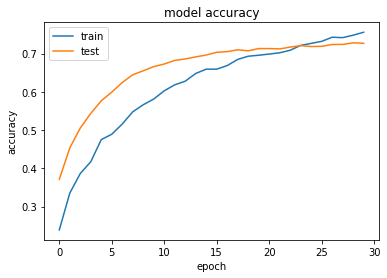

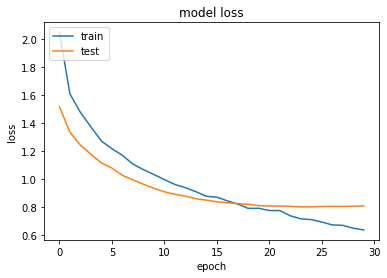

In [ ]:
# Accuracy plot
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Loss plot
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

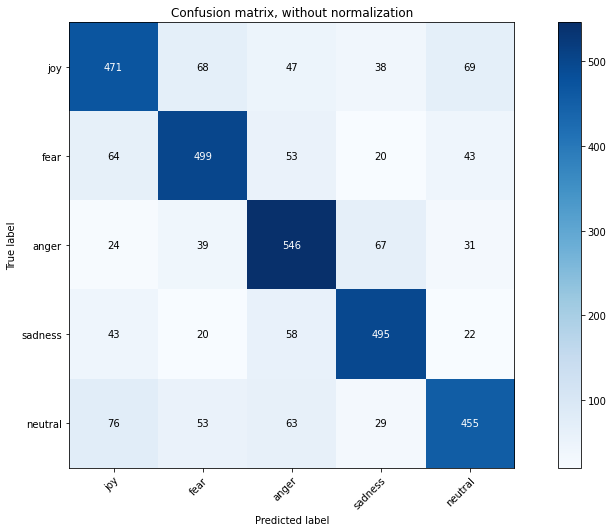

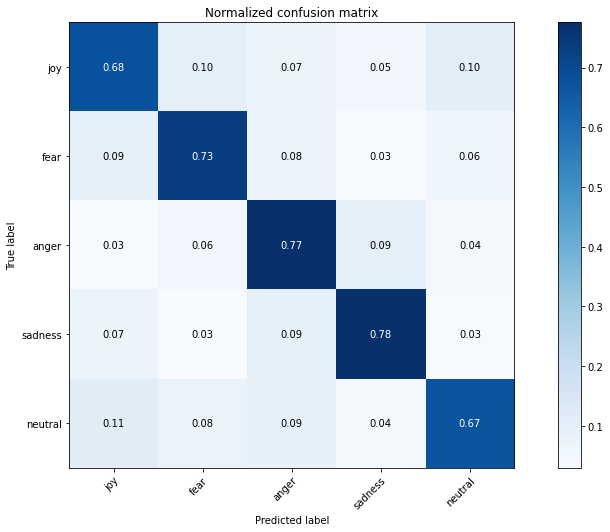

In [ ]:
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plot_confusion_matrix(data_test.Emotion, predictions, classes=class_names, title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plot_confusion_matrix(data_test.Emotion, predictions, classes=class_names, normalize=True, title='Normalized confusion matrix')

plt.show()

In [ ]:
model.save('models/h5_cnn_w2v.h5')

In [ ]:
from keras.models import load_model
model = load_model('models/h5_cnn_w2v.h5')

In [ ]:
# Convolution

model = Sequential()
model.add(embedd_layer)
# Add Convolutional layer
model.add(Conv1D(filters=64, kernel_size=5, padding='same', activation='relu'))
model.add(MaxPooling1D(3))
model.add(GlobalMaxPooling1D())
model.add(BatchNormalization())

# Add fully connected layers
model.add(Dense(20, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

# Summarize the model
model.summary()

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 500, 300)          3659700   
_________________________________________________________________
conv1d_20 (Conv1D)           (None, 500, 64)           96064     
_________________________________________________________________
max_pooling1d_20 (MaxPooling (None, 166, 64)           0         
_________________________________________________________________
global_max_pooling1d_20 (Glo (None, 64)                0         
_________________________________________________________________
batch_normalization_20 (Batc (None, 64)                256       
_________________________________________________________________
dense_41 (Dense)             (None, 20)                1300      
_________________________________________________________________
dropout_20 (Dropout)         (None, 20)              

In [ ]:
model.compile(loss = 'categorical_crossentropy', optimizer = Nadam(lr=0.0001, clipnorm=1.0), metrics = ['accuracy'])

In [ ]:
batch_size = 32
epochs = 30

hist = model.fit(X_train_pad, y_train, 
                 batch_size=batch_size,
                 epochs=epochs,
                 validation_data=(X_test_pad,y_test))

Epoch 1/30
248/248 [==============================] - 51s 206ms/step - loss: 1.8060 - accuracy: 0.2953 - val_loss: 1.4648 - val_accuracy: 0.3949
Epoch 2/30
248/248 [==============================] - 51s 204ms/step - loss: 1.4403 - accuracy: 0.3985 - val_loss: 1.2844 - val_accuracy: 0.4798
Epoch 3/30
248/248 [==============================] - 51s 204ms/step - loss: 1.2919 - accuracy: 0.4632 - val_loss: 1.1836 - val_accuracy: 0.5293
Epoch 4/30
248/248 [==============================] - 51s 204ms/step - loss: 1.1923 - accuracy: 0.5120 - val_loss: 1.1113 - val_accuracy: 0.5759
Epoch 5/30
248/248 [==============================] - 51s 205ms/step - loss: 1.0980 - accuracy: 0.5586 - val_loss: 1.0632 - val_accuracy: 0.6004
Epoch 6/30
248/248 [==============================] - 51s 205ms/step - loss: 1.0210 - accuracy: 0.6036 - val_loss: 1.0117 - val_accuracy: 0.6189
Epoch 7/30
248/248 [==============================] - 51s 206ms/step - loss: 0.9651 - accuracy: 0.6216 - val_loss: 0.9822 - val_ac

In [ ]:
predictions = model.predict(X_test_pad)
predictions = np.argmax(predictions, axis=1)
predictions = [class_names[pred] for pred in predictions]

In [ ]:
print("Accuracy: {:.4f}%".format(accuracy_score(data_test.Emotion, predictions) * 100))
print("\nF1 Score: {:.4f}".format(f1_score(data_test.Emotion, predictions, average='macro') * 100))
print("\nRecall Score: {:.4f}".format(recall_score(data_test.Emotion, predictions, average='macro') * 100))
print("\nPrecision Score: {:.4f}".format(precision_score(data_test.Emotion, predictions, average='macro') * 100))

Accuracy: 70.0855%

F1 Score: 70.1840

Recall Score: 70.1530

Precision Score: 70.3044


In [ ]:
print(f1_score(data_test.Emotion, predictions, average=None) * 100)
print(recall_score(data_test.Emotion, predictions, average=None) * 100)
print(precision_score(data_test.Emotion, predictions, average=None) * 100)

[65.7  71.04 70.92 76.19 67.07]
[68.4  69.37 71.57 76.49 64.94]
[63.2  72.8  70.28 75.89 69.35]


In [ ]:
model.save('models/h6_cnn_w2v.h5')

## Emotion Classification in text using LSTM 
### Workflow: 
1. Import Data
2. Prepare the input data
3. Import pre-trained W2V
4. Create Neural Network Pipeline
5. Train The Model
6. Evaluate results

### 1. Import Data

In [ ]:
import pandas as pd
import numpy as np

# text preprocessing
from nltk.tokenize import word_tokenize
import re

# plots and metrics
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, recall_score, precision_score

# preparing input to our model
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical

# keras layers
from keras.models import Sequential
from keras.layers import Embedding, Bidirectional, LSTM, GRU, Dense, GlobalMaxPooling1D, MaxPooling1D, BatchNormalization, Dropout

In [ ]:
#Defining vector space dimension and fixed input size
# Number of labels: joy, anger, fear, sadness, neutral
num_classes = 5

# Number of dimensions for word embedding
embed_num_dims = 300

# Max input length (max number of words) 
max_seq_len = 500

class_names = ['joy', 'fear', 'anger', 'sadness', 'neutral']

In [ ]:
#Importing our training and testing datasets
data_train = pd.read_csv('/content/drive/MyDrive/it809/data_train.csv', encoding='utf-8')
data_test = pd.read_csv('/content/drive/MyDrive/it809/data_test.csv', encoding='utf-8')

X_train = data_train.Text
X_test = data_test.Text

y_train = data_train.Emotion
y_test = data_test.Emotion

data = data_train.append(data_test, ignore_index=True)

### 2. Prepare input data
To input the data to our NN Model we'll need some preprocessing:
1. Tokenize our texts and count unique tokens
2. Padding: each input (sentence or text) has to be of the same lenght
3. Labels have to be converted to integeres and categorized

Basic preprocessing and tokenization using nltk to double check that sentences are properly split into words.
We could also add stopword removal but steps like stemming or lemmatization are not needed since we are using word2vec and words with the same stem can have a different meaning

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
def clean_text(data):
    
    # remove @usernames
    data = re.sub(r"(@[\d\w\.]+)", '', data)
    
    # tekenization using nltk
    data = word_tokenize(data)
    
    return data

In [ ]:
texts = [' '.join(clean_text(text)) for text in data.Text]
texts_train = [' '.join(clean_text(text)) for text in X_train]
texts_test = [' '.join(clean_text(text)) for text in X_test]

In [ ]:
print(texts_train[92])

a bit ? I 'm extremely annoyed that he did n't phone me when he promised me that he would ! He 's such a liar .


**Tokenization + fitting using keras**

In [ ]:
#Tokenization + fitting using keras
tokenizer = Tokenizer(num_words=None,
                      filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',
                      lower=True,
                      split=" ",
                      char_level=False)
tokenizer.fit_on_texts(texts)

sequence_train = tokenizer.texts_to_sequences(texts_train)
sequence_test = tokenizer.texts_to_sequences(texts_test)

index_of_words = tokenizer.word_index

# vacab size is number of unique words + reserved 0 index for padding
vocab_size = len(index_of_words) + 1

# Extract variables
print('Vocab size: {}'.format(vocab_size))
longest = max(len(seq) for seq in sequence_train)
print("Longest comment size: {}".format(longest))
average = np.mean([len(seq) for seq in sequence_train])
print("Average comment size: {}".format(average))
stdev = np.std([len(seq) for seq in sequence_train])
print("Stdev of comment size: {}".format(stdev))
max_len = int(average + stdev * 3)
print('Max comment size: {}'.format(max_len))

Vocab size: 12199
Longest comment size: 235
Average comment size: 16.198008570708343
Stdev of comment size: 13.375809032425684
Max comment size: 56


**Padding** -> each input has the same length

We defined maximum number of words for our texts and input size to our model has to be fixed - padding with zeros to keep the same input lenght (longest input in our dataset is ~250 words)

In [ ]:
X_train_pad = pad_sequences(sequence_train, maxlen = max_seq_len )
X_test_pad = pad_sequences(sequence_test, maxlen = max_seq_len )
data_t = data_train["Text"]
for sample_i, (sent, token_sent) in enumerate(zip(data_t[:2], sequence_train[:2])):
    print('Sequence {}'.format(sample_i + 1))
    print('  Input:  {}'.format(sent))
    print('  Output: {}'.format(token_sent))

Sequence 1
  Input:   There are tons of other paintings that I think are better . 
  Output: [57, 51, 5956, 8, 132, 3306, 11, 1, 119, 51, 345]
Sequence 2
  Input:  Yet the dog had grown old and less capable , and one day the gillie had come and explained with great sorrow that the dog had suffered a stroke , and must be put down . 
  Output: [420, 2, 312, 14, 1469, 168, 5, 575, 2372, 5, 45, 75, 2, 5957, 14, 138, 5, 2092, 18, 180, 847, 11, 2, 312, 14, 818, 3, 1713, 5, 284, 37, 277, 154]


**Categorize** labels:

In [ ]:
encoding = {
    'joy': 0,
    'fear': 1,
    'anger': 2,
    'sadness': 3,
    'neutral': 4
}

# Integer labels
y_train = [encoding[x] for x in data_train.Emotion]
y_test = [encoding[x] for x in data_test.Emotion]

In [ ]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

y_train

array([[0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.]], dtype=float32)

### 2. Import pretrained word vectors
* Importing pretrained word2vec from file and creating embedding matrix
* We will later map each word in our corpus to existing word vector

In [ ]:
def create_embedding_matrix(filepath, word_index, embedding_dim):
    vocab_size = len(word_index) + 1  # Adding again 1 because of reserved 0 index
    embedding_matrix = np.zeros((vocab_size, embedding_dim))
    with open(filepath) as f:
        for line in f:
            word, *vector = line.split()
            if word in word_index:
                idx = word_index[word] 
                embedding_matrix[idx] = np.array(
                    vector, dtype=np.float32)[:embedding_dim]
    return embedding_matrix

You can download and import any pre-trained word embeddings. I will use 300 dimentional w2v pre-trained on wikipedia articles. Download fast text english vectors: https://fasttext.cc/docs/en/english-vectors.html

In [ ]:
import urllib.request
import zipfile
import os

fname = 'embeddings/wiki-news-300d-1M.vec'

if not os.path.isfile(fname):
    print('Downloading word vectors...')
    urllib.request.urlretrieve('https://dl.fbaipublicfiles.com/fasttext/vectors-english/wiki-news-300d-1M.vec.zip',
                              'wiki-news-300d-1M.vec.zip')
    print('Unzipping...')
    with zipfile.ZipFile('wiki-news-300d-1M.vec.zip', 'r') as zip_ref:
        zip_ref.extractall('embeddings')
    print('done.')
    
    os.remove('wiki-news-300d-1M.vec.zip')

Unzipping...
done.


In [ ]:
embedd_matrix = create_embedding_matrix(fname, index_of_words, embed_num_dims)
embedd_matrix.shape

(12199, 300)

Some of the words from our corpus were not included in the pre-trained word vectors. If we inspect those words we'll see that it's mostly spelling errors. 

In [ ]:
# Inspect unseen words
new_words = 0

for word in index_of_words:
    entry = embedd_matrix[index_of_words[word]]
    if all(v == 0 for v in entry):
        new_words = new_words + 1

print('Words found in wiki vocab: ' + str(len(index_of_words) - new_words))
print('New words found: ' + str(new_words))

Words found in wiki vocab: 11490
New words found: 708


## 3. Create LSTM Pipeline
### Embedding Layer

We will use pre-trained word vectors. We could also train our own embedding layer if we don't specify the pre-trained weights 

* **vocabulary size:** the maximum number of terms that are used to represent a text: e.g. if we set the size of the “vocabulary” to 1000 only the first thousand terms most frequent in the corpus will be considered (and the other terms will be ignored)
* **the maximum length:** of the texts (which must all be the same length)
* **size of embeddings:** basically, the more dimensions we have the more precise the semantics will be, but beyond a certain threshold we will lose the ability of the embedding to define a coherent and general enough semantic area
* **trainable:** True if you want to fine-tune them while training

In [ ]:
embedd_layer = Embedding(vocab_size,
                         embed_num_dims,
                         input_length = max_seq_len,
                         weights = [embedd_matrix],
                         trainable=False)

### Model Pipeline
- the input is the first N words of each text (with proper padding)
- the first level creates embedding of words, using vocabulary with a certain dimension, and a given size of embeddings
- LSTM layer which will receive word embeddings for each token in the tweet as inputs. The intuition is that its output tokens will store information not only of the initial token, but also any previous tokens; In other words, the LSTM layer is generating a new encoding for the original input.
- the output level has a number of neurons equal to the classes of the problem and a “softmax” activation function

In [ ]:
import keras.backend
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D
from keras.layers import Dropout, GlobalMaxPooling1D, BatchNormalization
from keras.layers import Bidirectional
from keras.layers.embeddings import Embedding
from keras.optimizers import Nadam

# Initate model
model = Sequential()

# Add Embedding layer
model.add(embedd_layer)

# Add Recurrent layer
model.add(LSTM(60, return_sequences=True, name='lstm_layer'))
model.add(MaxPooling1D(3))
model.add(GlobalMaxPooling1D())
model.add(BatchNormalization())

# Add fully connected layers
model.add(Dense(50, activation='relu')) #hidden
model.add(Dropout(0.3))
model.add(Dense(num_classes, activation='softmax'))

# Summarize the model
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 500, 300)          3659700   
_________________________________________________________________
lstm_layer (LSTM)            (None, 500, 60)           86640     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 166, 60)           0         
_________________________________________________________________
global_max_pooling1d (Global (None, 60)                0         
_________________________________________________________________
batch_normalization (BatchNo (None, 60)                240       
_________________________________________________________________
dense (Dense)                (None, 50)                3050      
_________________________________________________________________
dropout (Dropout)            (None, 50)                0

In [ ]:
model.compile(loss = 'categorical_crossentropy', optimizer = Nadam(lr=0.0001, clipnorm=1.0), metrics = ['accuracy'])

### 3. Train the Model
* **validation data**: use validation_split in order to estimate how well your model has been trained and adjust parameters or add dropout layers. After that we will train the model using the complete train set.
* **epochs**: 20 **batch_size**: 64

In [ ]:
batch_size = 64
epochs = 30

hist = model.fit(X_train_pad, y_train, 
                 batch_size=batch_size,
                 epochs=epochs,
                 validation_data=(X_test_pad,y_test))

Epoch 1/30
124/124 [==============================] - 82s 639ms/step - loss: 1.7404 - accuracy: 0.2387 - val_loss: 1.5784 - val_accuracy: 0.3655
Epoch 2/30
124/124 [==============================] - 78s 628ms/step - loss: 1.4458 - accuracy: 0.3644 - val_loss: 1.5261 - val_accuracy: 0.4220
Epoch 3/30
124/124 [==============================] - 78s 628ms/step - loss: 1.3573 - accuracy: 0.4270 - val_loss: 1.4397 - val_accuracy: 0.4819
Epoch 4/30
124/124 [==============================] - 78s 630ms/step - loss: 1.2862 - accuracy: 0.4774 - val_loss: 1.3218 - val_accuracy: 0.5332
Epoch 5/30
124/124 [==============================] - 78s 627ms/step - loss: 1.2084 - accuracy: 0.5226 - val_loss: 1.2072 - val_accuracy: 0.5656
Epoch 6/30
124/124 [==============================] - 78s 628ms/step - loss: 1.1520 - accuracy: 0.5607 - val_loss: 1.1190 - val_accuracy: 0.5971
Epoch 7/30
124/124 [==============================] - 78s 626ms/step - loss: 1.0759 - accuracy: 0.5882 - val_loss: 1.0637 - val_ac

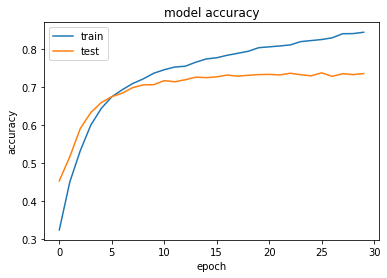

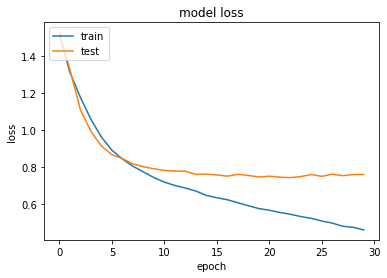

In [ ]:
#  "Accuracy"
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# "Loss"
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### 4. Evaluation

In [ ]:
predictions = model.predict(X_test_pad)
predictions = np.argmax(predictions, axis=1)
predictions = [class_names[pred] for pred in predictions]

In [ ]:
print("Accuracy: {:.4f}%".format(accuracy_score(data_test.Emotion, predictions) * 100))
print("\nF1 Score: {:.4f}".format(f1_score(data_test.Emotion, predictions, average='macro') * 100))
print("\nRecall Score: {:.4f}".format(recall_score(data_test.Emotion, predictions, average='macro') * 100))
print("\nPrecision Score: {:.4f}".format(precision_score(data_test.Emotion, predictions, average='macro') * 100))

Accuracy: 69.2013%

F1 Score: 69.1829

Recall Score: 69.3179

Precision Score: 69.3678


In [ ]:
print(f1_score(data_test.Emotion, predictions, average=None) * 100)
print(recall_score(data_test.Emotion, predictions, average=None) * 100)
print(precision_score(data_test.Emotion, predictions, average=None) * 100)

[64.08504176 70.52384676 69.91210277 74.62908012 66.7644901 ]
[60.89466089 66.42120766 73.12588402 78.84012539 67.30769231]
[67.62820513 75.16666667 66.96891192 70.84507042 66.22998544]


#### Plotting confusion Matrix:

In [ ]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    '''
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    '''
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    fig, ax = plt.subplots()
    
    # Set size
    fig.set_size_inches(12.5, 7.5)
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.grid(False)
    
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

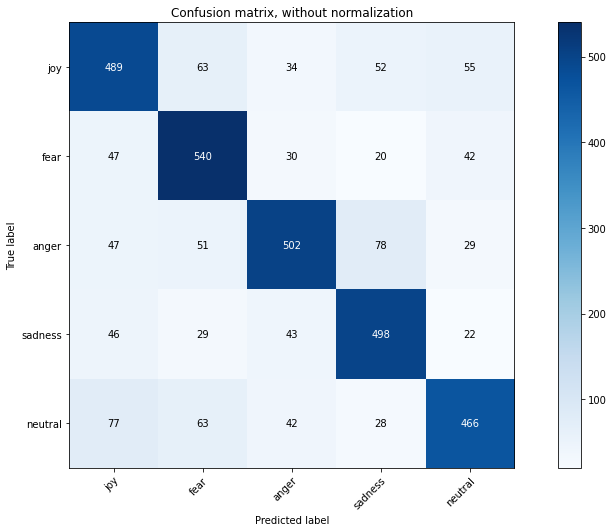

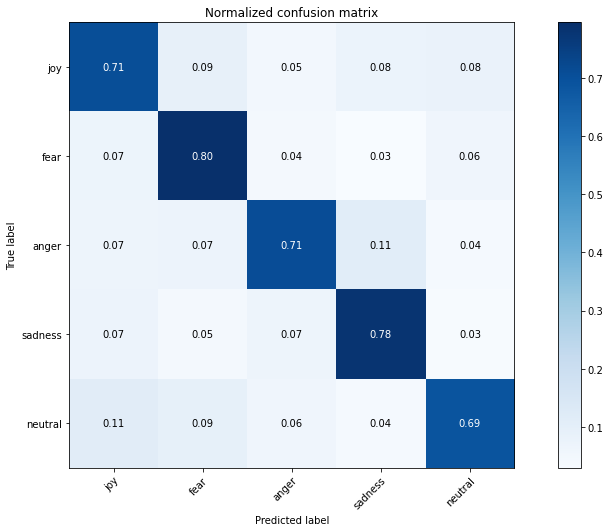

In [ ]:
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plot_confusion_matrix(data_test.Emotion, predictions, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plot_confusion_matrix(data_test.Emotion, predictions, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

#### Let's try other inputs:

In [ ]:
import time

message = ['delivery was hour late and my pizza was cold!']

seq = tokenizer.texts_to_sequences(message)
padded = pad_sequences(seq, maxlen=max_seq_len)

start_time = time.time()
pred = model.predict(padded)

print('Message: ' + str(message))
print('predicted: {} ({:.2f} seconds)'.format(class_names[np.argmax(pred)], (time.time() - start_time)))

Message: ['delivery was hour late and my pizza was cold!']
predicted: fear (0.07 seconds)


### Done
Save the model for later use

In [ ]:
# creates a HDF5 file 'my_model.h5'
model.save('models/LSTM_w2v.h5')

In [ ]:
from keras.models import load_model
predictor = load_model('models/LSTM_w2v.h5')

### Hyper parameter tuning for LSTM

In [ ]:
import keras.backend
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D
from keras.layers import Dropout, GlobalMaxPooling1D, BatchNormalization
from keras.layers import Bidirectional
from keras.layers.embeddings import Embedding
from keras.optimizers import Nadam

# Initate model
model = Sequential()

# Add Embedding layer
model.add(embedd_layer)

# Add Recurrent layer
model.add(LSTM(60, return_sequences=True, name='lstm_layer'))
model.add(MaxPooling1D(3))
model.add(GlobalMaxPooling1D())
model.add(BatchNormalization())

# Add fully connected layers
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(num_classes, activation='softmax'))

# Summarize the model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 500, 300)          3659700   
_________________________________________________________________
lstm_layer (LSTM)            (None, 500, 60)           86640     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 166, 60)           0         
_________________________________________________________________
global_max_pooling1d (Global (None, 60)                0         
_________________________________________________________________
batch_normalization (BatchNo (None, 60)                240       
_________________________________________________________________
dense (Dense)                (None, 50)                3050      
_________________________________________________________________
dropout (Dropout)            (None, 50)                0

In [ ]:
model.compile(loss = 'categorical_crossentropy', optimizer = Nadam(lr=0.0001, clipnorm=1.0), metrics = ['accuracy'])
batch_size = 32
epochs = 30

hist = model.fit(X_train_pad, y_train, 
                 batch_size=batch_size,
                 epochs=epochs,
                 validation_data=(X_test_pad,y_test))

Epoch 1/30
248/248 [==============================] - 93s 361ms/step - loss: 1.6812 - accuracy: 0.2629 - val_loss: 1.5329 - val_accuracy: 0.4179
Epoch 2/30
248/248 [==============================] - 89s 358ms/step - loss: 1.3687 - accuracy: 0.4190 - val_loss: 1.3536 - val_accuracy: 0.4898
Epoch 3/30
248/248 [==============================] - 89s 358ms/step - loss: 1.2521 - accuracy: 0.4747 - val_loss: 1.1668 - val_accuracy: 0.5582
Epoch 4/30
248/248 [==============================] - 89s 360ms/step - loss: 1.1401 - accuracy: 0.5612 - val_loss: 1.0601 - val_accuracy: 0.6095
Epoch 5/30
248/248 [==============================] - 94s 379ms/step - loss: 1.0529 - accuracy: 0.6044 - val_loss: 1.0021 - val_accuracy: 0.6233
Epoch 6/30
248/248 [==============================] - 89s 359ms/step - loss: 1.0053 - accuracy: 0.6206 - val_loss: 0.9611 - val_accuracy: 0.6390
Epoch 7/30
248/248 [==============================] - 89s 361ms/step - loss: 0.9501 - accuracy: 0.6523 - val_loss: 0.9290 - val_ac

In [ ]:
predictions = model.predict(X_test_pad)
predictions = np.argmax(predictions, axis=1)
predictions = [class_names[pred] for pred in predictions]
print("Accuracy: {:.4f}%".format(accuracy_score(data_test.Emotion, predictions) * 100))
print("\nF1 Score: {:.4f}".format(f1_score(data_test.Emotion, predictions, average='macro') * 100))
print("\nRecall Score: {:.4f}".format(recall_score(data_test.Emotion, predictions, average='macro') * 100))
print("\nPrecision Score: {:.4f}".format(precision_score(data_test.Emotion, predictions, average='macro') * 100))
print(f1_score(data_test.Emotion, predictions, average=None) * 100)
print(recall_score(data_test.Emotion, predictions, average=None) * 100)
print(precision_score(data_test.Emotion, predictions, average=None) * 100)

Accuracy: 70.2623%

F1 Score: 70.2348

Recall Score: 70.3733

Precision Score: 70.3852
[67.13581985 70.96774194 71.46932953 74.67057101 66.93037975]
[68.83116883 69.66126657 70.86280057 79.93730408 62.5739645 ]
[65.52197802 72.32415902 72.08633094 70.05494505 71.93877551]


In [ ]:
# creates a HDF5 file 'my_model.h5'
model.save('models/h1_LSTM_w2v.h5')

In [ ]:
import keras.backend
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D
from keras.layers import Dropout, GlobalMaxPooling1D, BatchNormalization
from keras.layers import Bidirectional
from keras.layers.embeddings import Embedding
from keras.optimizers import Nadam

# Initate model
model = Sequential()

# Add Embedding layer
model.add(embedd_layer)

# Add Recurrent layer
model.add(LSTM(60, return_sequences=True, name='lstm_layer'))
model.add(MaxPooling1D(3))
model.add(GlobalMaxPooling1D())
model.add(BatchNormalization())

# Add fully connected layers
model.add(Dense(30, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(num_classes, activation='softmax'))

# Summarize the model
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 500, 300)          3659700   
_________________________________________________________________
lstm_layer (LSTM)            (None, 500, 60)           86640     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 166, 60)           0         
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 60)                0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 60)                240       
_________________________________________________________________
dense_2 (Dense)              (None, 30)                1830      
_________________________________________________________________
dropout_1 (Dropout)          (None, 30)               

In [ ]:
model.compile(loss = 'categorical_crossentropy', optimizer = Nadam(lr=0.0001, clipnorm=1.0), metrics = ['accuracy'])
batch_size = 32
epochs = 30

hist = model.fit(X_train_pad, y_train, 
                 batch_size=batch_size,
                 epochs=epochs,
                 validation_data=(X_test_pad,y_test))

Epoch 1/30
248/248 [==============================] - 93s 364ms/step - loss: 1.6930 - accuracy: 0.2634 - val_loss: 1.5420 - val_accuracy: 0.3952
Epoch 2/30
248/248 [==============================] - 89s 361ms/step - loss: 1.4009 - accuracy: 0.3922 - val_loss: 1.3773 - val_accuracy: 0.4719
Epoch 3/30
248/248 [==============================] - 91s 366ms/step - loss: 1.3125 - accuracy: 0.4534 - val_loss: 1.2187 - val_accuracy: 0.5308
Epoch 4/30
248/248 [==============================] - 91s 365ms/step - loss: 1.1984 - accuracy: 0.5291 - val_loss: 1.1266 - val_accuracy: 0.5656
Epoch 5/30
248/248 [==============================] - 91s 367ms/step - loss: 1.1389 - accuracy: 0.5570 - val_loss: 1.0539 - val_accuracy: 0.5992
Epoch 6/30
248/248 [==============================] - 90s 363ms/step - loss: 1.0686 - accuracy: 0.5935 - val_loss: 1.0057 - val_accuracy: 0.6207
Epoch 7/30
248/248 [==============================] - 90s 364ms/step - loss: 1.0096 - accuracy: 0.6226 - val_loss: 0.9663 - val_ac

In [ ]:
predictions = model.predict(X_test_pad)
predictions = np.argmax(predictions, axis=1)
predictions = [class_names[pred] for pred in predictions]
print("Accuracy: {:.4f}%".format(accuracy_score(data_test.Emotion, predictions) * 100))
print("\nF1 Score: {:.4f}".format(f1_score(data_test.Emotion, predictions, average='macro') * 100))
print("\nRecall Score: {:.4f}".format(recall_score(data_test.Emotion, predictions, average='macro') * 100))
print("\nPrecision Score: {:.4f}".format(precision_score(data_test.Emotion, predictions, average='macro') * 100))
print(f1_score(data_test.Emotion, predictions, average=None) * 100)
print(recall_score(data_test.Emotion, predictions, average=None) * 100)
print(precision_score(data_test.Emotion, predictions, average=None) * 100)

Accuracy: 68.4940%

F1 Score: 68.4794

Recall Score: 68.6417

Precision Score: 68.7546
[64.45 71.4  67.85 73.26 65.43]
[67.24 72.61 64.78 78.37 60.21]
[61.89 70.23 71.23 68.78 71.65]


In [ ]:
# creates a HDF5 file 'my_model.h5'
model.save('models/h2_LSTM_w2v.h5')

In [ ]:
import keras.backend
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D
from keras.layers import Dropout, GlobalMaxPooling1D, BatchNormalization
from keras.layers import Bidirectional
from keras.layers.embeddings import Embedding
from keras.optimizers import Nadam

# Initate model
model = Sequential()

# Add Embedding layer
model.add(embedd_layer)

# Add Recurrent layer
model.add(LSTM(60, return_sequences=True, name='lstm_layer'))
model.add(MaxPooling1D(2))
model.add(GlobalMaxPooling1D())
model.add(BatchNormalization())

# Add fully connected layers
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(num_classes, activation='softmax'))

# Summarize the model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 500, 300)          3659700   
_________________________________________________________________
lstm_layer (LSTM)            (None, 500, 60)           86640     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 250, 60)           0         
_________________________________________________________________
global_max_pooling1d (Global (None, 60)                0         
_________________________________________________________________
batch_normalization (BatchNo (None, 60)                240       
_________________________________________________________________
dense (Dense)                (None, 50)                3050      
_________________________________________________________________
dropout (Dropout)            (None, 50)                0

In [ ]:
model.compile(loss = 'categorical_crossentropy', optimizer = Nadam(lr=0.0001, clipnorm=1.0), metrics = ['accuracy'])
batch_size = 32
epochs = 30

hist = model.fit(X_train_pad, y_train, 
                 batch_size=batch_size,
                 epochs=epochs,
                 validation_data=(X_test_pad,y_test))

Epoch 1/30
248/248 [==============================] - 86s 332ms/step - loss: 1.6246 - accuracy: 0.2639 - val_loss: 1.5307 - val_accuracy: 0.4530
Epoch 2/30
248/248 [==============================] - 82s 331ms/step - loss: 1.3513 - accuracy: 0.4214 - val_loss: 1.3285 - val_accuracy: 0.5164
Epoch 3/30
248/248 [==============================] - 82s 331ms/step - loss: 1.1979 - accuracy: 0.5234 - val_loss: 1.1120 - val_accuracy: 0.5906
Epoch 4/30
248/248 [==============================] - 82s 332ms/step - loss: 1.0881 - accuracy: 0.5849 - val_loss: 0.9946 - val_accuracy: 0.6328
Epoch 5/30
248/248 [==============================] - 82s 329ms/step - loss: 0.9839 - accuracy: 0.6299 - val_loss: 0.9158 - val_accuracy: 0.6590
Epoch 6/30
248/248 [==============================] - 82s 330ms/step - loss: 0.8949 - accuracy: 0.6703 - val_loss: 0.8688 - val_accuracy: 0.6746
Epoch 7/30
248/248 [==============================] - 82s 331ms/step - loss: 0.8433 - accuracy: 0.6899 - val_loss: 0.8477 - val_ac

In [ ]:
predictions = model.predict(X_test_pad)
predictions = np.argmax(predictions, axis=1)
predictions = [class_names[pred] for pred in predictions]
print("Accuracy: {:.4f}%".format(accuracy_score(data_test.Emotion, predictions) * 100))
print("\nF1 Score: {:.4f}".format(f1_score(data_test.Emotion, predictions, average='macro') * 100))
print("\nRecall Score: {:.4f}".format(recall_score(data_test.Emotion, predictions, average='macro') * 100))
print("\nPrecision Score: {:.4f}".format(precision_score(data_test.Emotion, predictions, average='macro') * 100))
print(f1_score(data_test.Emotion, predictions, average=None) * 100)
print(recall_score(data_test.Emotion, predictions, average=None) * 100)
print(precision_score(data_test.Emotion, predictions, average=None) * 100)

Accuracy: 73.5337%

F1 Score: 73.5352

Recall Score: 73.6174

Precision Score: 73.6652
[69.90707648 75.78947368 73.93225331 75.79908676 72.24806202]
[70.56277056 79.5287187  71.00424328 78.05642633 68.93491124]
[69.26345609 72.38605898 77.11213518 73.66863905 75.89576547]


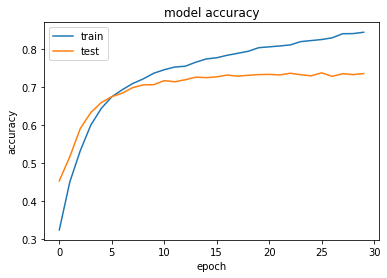

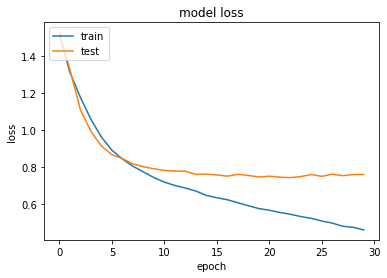

In [ ]:
#  "Accuracy"
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# "Loss"
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# creates a HDF5 file 'my_model.h5'
model.save('models/h3_LSTM_w2v.h5')

## BERT

Applying BERT to the problem of multiclass text classification. Our dataset consists of tweets labeled with one of the five emotion categories: joy, anger, sadness, fear, neutral. 

## Workflow: 
1. Import Data
2. Data preprocessing and downloading BERT
3. Training and validation
4. Saving the model

👋  **Let's start** 

In [ ]:
!nvidia-smi

Mon May 17 13:00:22 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.19.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P8    26W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!pip install --upgrade grpcio

     |████████████████████████████████| 4.2MB 5.7MB/s 
ERROR: tensorflow 2.4.1 has requirement grpcio~=1.32.0, but you'll have grpcio 1.37.1 which is incompatible.
  Found existing installation: grpcio 1.32.0
    Uninstalling grpcio-1.32.0:
      Successfully uninstalled grpcio-1.32.0


In [ ]:
!pip install tqdm

In [ ]:
!pip install bert-for-tf2

     |████████████████████████████████| 51kB 5.3MB/s 
  Created wheel for bert-for-tf2: filename=bert_for_tf2-0.14.9-cp37-none-any.whl size=30535 sha256=e1b8fbd14a0b6793318d9eb0e2c266e330ab6e6b69bda1e1133af98961bb2209
  Stored in directory: /root/.cache/pip/wheels/a1/04/ee/347bd9f5b821b637c76411d280271a857aece00358896a230f
  Created wheel for py-params: filename=py_params-0.10.2-cp37-none-any.whl size=7912 sha256=cdafd4c986d0193054a70db54bacc9e636f07923c047beb8789deb29db152878
  Stored in directory: /root/.cache/pip/wheels/d0/4a/70/ff12450229ff1955abf01f365051d4faae1c20aef53ab4cf09
  Created wheel for params-flow: filename=params_flow-0.8.2-cp37-none-any.whl size=19472 sha256=5f89413afcba3c1e5c89a541d49f369d919f1052a6168a9cca4dcdb8a82507c3
  Stored in directory: /root/.cache/pip/wheels/08/c8/7f/81c86b9ff2b86e2c477e3914175be03e679e596067dc630c06
Successfully built bert-for-tf2 py-params params-flow


In [ ]:
!pip install sentencepiece

     |████████████████████████████████| 1.2MB 11.0MB/s 


In [ ]:
import os
import math
import datetime

from tqdm import tqdm

import pandas as pd
import numpy as np

import tensorflow as tf
from tensorflow import keras

import bert
from bert import BertModelLayer
from bert.loader import StockBertConfig, map_stock_config_to_params, load_stock_weights
from bert.tokenization.bert_tokenization import FullTokenizer

import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from matplotlib import rc

from sklearn.metrics import confusion_matrix, classification_report

%matplotlib inline

RANDOM_SEED = 42

np.random.seed(RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED)

### 1. Import Data

In [ ]:
data_train = pd.read_csv('/content/drive/MyDrive/it809/data_train.csv', encoding='utf-8')
data_test = pd.read_csv('/content/drive/MyDrive/it809/data_test.csv', encoding='utf-8')

**Emotion Recognition with BERT**

BERT is a pre-trained Transformer Encoder stack. It is trained on Wikipedia and the Book Corpus dataset. 

It has two versions - Base (12 encoders) and Large (24 encoders).

In [ ]:
# downloading one of the simpler pre-trained models
!wget https://storage.googleapis.com/bert_models/2018_10_18/uncased_L-12_H-768_A-12.zip

--2021-05-17 13:02:17--  https://storage.googleapis.com/bert_models/2018_10_18/uncased_L-12_H-768_A-12.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.166.128, 74.125.71.128, 64.233.184.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.166.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 407727028 (389M) [application/zip]
Saving to: ‘uncased_L-12_H-768_A-12.zip’

uncased_L-12_H-768_ 100%[===================>] 388.84M   175MB/s    in 2.2s    

2021-05-17 13:02:20 (175 MB/s) - ‘uncased_L-12_H-768_A-12.zip’ saved [407727028/407727028]



In [ ]:
# This will unzip a checkpoint, config, and vocabulary, along with other files.
!unzip uncased_L-12_H-768_A-12.zip

Archive:  uncased_L-12_H-768_A-12.zip
   creating: uncased_L-12_H-768_A-12/
  inflating: uncased_L-12_H-768_A-12/bert_model.ckpt.meta  
  inflating: uncased_L-12_H-768_A-12/bert_model.ckpt.data-00000-of-00001  
  inflating: uncased_L-12_H-768_A-12/vocab.txt  
  inflating: uncased_L-12_H-768_A-12/bert_model.ckpt.index  
  inflating: uncased_L-12_H-768_A-12/bert_config.json  


In [ ]:
os.makedirs("model", exist_ok=True)

In [ ]:
!mv uncased_L-12_H-768_A-12/ model

In [ ]:
bert_model_name="uncased_L-12_H-768_A-12"

bert_ckpt_dir = os.path.join("model/", bert_model_name)
bert_ckpt_file = os.path.join(bert_ckpt_dir, "bert_model.ckpt")
bert_config_file = os.path.join(bert_ckpt_dir, "bert_config.json")

#### Preprocessing

In [ ]:
class EmotionDetectionData:
  DATA_COLUMN = "Text"
  LABEL_COLUMN = "Emotion"

  def __init__(self, train, test, tokenizer: FullTokenizer, classes, max_seq_len=152):
    self.tokenizer = tokenizer
    self.max_seq_len = 0
    self.classes = classes
    
    ((self.train_x, self.train_y), (self.test_x, self.test_y)) = map(self._prepare, [train, test])

    print("max seq_len", self.max_seq_len)
    self.max_seq_len = min(self.max_seq_len, max_seq_len)
    self.train_x, self.test_x = map(self._pad, [self.train_x, self.test_x])

  def _prepare(self, df):
    x, y = [], []
    
    for _, row in tqdm(df.iterrows()):
      text, label = row[EmotionDetectionData.DATA_COLUMN], row[EmotionDetectionData.LABEL_COLUMN]
      tokens = self.tokenizer.tokenize(text)
      tokens = ["[CLS]"] + tokens + ["[SEP]"]
      token_ids = self.tokenizer.convert_tokens_to_ids(tokens)
      self.max_seq_len = max(self.max_seq_len, len(token_ids))
      x.append(token_ids)
      y.append(self.classes.index(label))

    return np.array(x), np.array(y)

  def _pad(self, ids):
    x = []
    for input_ids in ids:
      input_ids = input_ids[:min(len(input_ids), self.max_seq_len - 2)]
      input_ids = input_ids + [0] * (self.max_seq_len - len(input_ids))
      x.append(np.array(input_ids))
    return np.array(x)

We need to convert the raw texts into vectors that we can feed into our model. We’ll go through 3 steps:

Tokenize the text
- Convert the sequence of tokens into numbers
- Pad the sequences so each one has the same length
- Let’s start by creating the BERT tokenizer:

In [ ]:
tokenizer = FullTokenizer(vocab_file=os.path.join(bert_ckpt_dir, "vocab.txt"))

In [ ]:
tokenizer.tokenize("I can't wait to visit Bulgaria again!")

['i', 'can', "'", 't', 'wait', 'to', 'visit', 'bulgaria', 'again', '!']

In [ ]:
# Convert the sequence of tokens into numbers
tokens = tokenizer.tokenize("I can't wait to visit Bulgaria again!")
tokenizer.convert_tokens_to_ids(tokens)

[1045, 2064, 1005, 1056, 3524, 2000, 3942, 8063, 2153, 999]

In [ ]:
def create_model(max_seq_len, bert_ckpt_file):

  with tf.io.gfile.GFile(bert_config_file, "r") as reader:
      bc = StockBertConfig.from_json_string(reader.read())
      bert_params = map_stock_config_to_params(bc)
      bert_params.adapter_size = None
      bert = BertModelLayer.from_params(bert_params, name="bert")
        
  input_ids = keras.layers.Input(shape=(max_seq_len, ), dtype='int32', name="input_ids")
  bert_output = bert(input_ids)

  print("bert shape", bert_output.shape)

  cls_out = keras.layers.Lambda(lambda seq: seq[:, 0, :])(bert_output)
  cls_out = keras.layers.Dropout(0.5)(cls_out)
  logits = keras.layers.Dense(units=768, activation="tanh")(cls_out)
  logits = keras.layers.Dropout(0.5)(logits)
  logits = keras.layers.Dense(units=len(classes), activation="softmax")(logits)

  model = keras.Model(inputs=input_ids, outputs=logits)
  model.build(input_shape=(None, max_seq_len))

  load_stock_weights(bert, bert_ckpt_file)
        
  return model

### Training

In [ ]:
classes = data_train.Emotion.unique().tolist()
print ("\nOur classes are: ", classes)

# We’ll start by creating the data object
data = EmotionDetectionData(data_train, data_test, tokenizer, classes, max_seq_len=128)

182it [00:00, 1818.22it/s]


Our classes are:  ['neutral', 'sadness', 'fear', 'anger', 'joy']


7934it [00:04, 1939.66it/s]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
3393it [00:01, 2005.55it/s]


max seq_len 277


In [ ]:
data.train_x.shape

(7934, 128)

In [ ]:
data.train_x[0]

array([ 101, 2045, 2024, 6197, 1997, 2060, 5265, 2008, 1045, 2228, 2024,
       2488, 1012,  102,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0])

In [ ]:
data.train_y[0]

0

In [ ]:
data.max_seq_len

128

In [ ]:
# We can now create the model using the maximum sequence length
model = create_model(data.max_seq_len, bert_ckpt_file)

bert shape (None, 128, 768)
Done loading 196 BERT weights from: model/uncased_L-12_H-768_A-12/bert_model.ckpt into <bert.model.BertModelLayer object at 0x7fdb21020510> (prefix:bert). Count of weights not found in the checkpoint was: [0]. Count of weights with mismatched shape: [0]
Unused weights from checkpoint: 
	bert/embeddings/token_type_embeddings
	bert/pooler/dense/bias
	bert/pooler/dense/kernel
	cls/predictions/output_bias
	cls/predictions/transform/LayerNorm/beta
	cls/predictions/transform/LayerNorm/gamma
	cls/predictions/transform/dense/bias
	cls/predictions/transform/dense/kernel
	cls/seq_relationship/output_bias
	cls/seq_relationship/output_weights


In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_ids (InputLayer)       [(None, 128)]             0         
_________________________________________________________________
bert (BertModelLayer)        (None, 128, 768)          108890112 
_________________________________________________________________
lambda (Lambda)              (None, 768)               0         
_________________________________________________________________
dropout (Dropout)            (None, 768)               0         
_________________________________________________________________
dense (Dense)                (None, 768)               590592    
_________________________________________________________________
dropout_1 (Dropout)          (None, 768)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 3845  

You’ll notice that even this “slim” BERT has almost 110 million parameters.
Fine-tuning models like BERT is both art and doing tons of failed experiments. Fortunately, the authors made some recommendations:

- Batch size: 16, 32
- Learning rate (Adam): 5e-5, 3e-5, 2e-5
- Number of epochs: 2, 3, 4

In [ ]:
# We’ll use Adam with a slightly different learning rate
# Use sparse categorical crossentropy, so we don’t have to one-hot encode our labels.
model.compile(
  optimizer=keras.optimizers.Adam(1e-5),
  loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=[keras.metrics.SparseCategoricalAccuracy(name="acc")]
)

In [ ]:
history = model.fit(
  x=data.train_x, 
  y=data.train_y,
  validation_data=(data.test_x,data.test_y),
  batch_size=16,
  shuffle=True,
  epochs=5
)

Epoch 1/5
496/496 [==============================] - 608s 1s/step - loss: 1.5971 - acc: 0.2989 - val_loss: 0.7238 - val_acc: 0.7536
Epoch 2/5
496/496 [==============================] - 581s 1s/step - loss: 0.7180 - acc: 0.7566 - val_loss: 0.5748 - val_acc: 0.8040
Epoch 3/5
496/496 [==============================] - 581s 1s/step - loss: 0.4797 - acc: 0.8367 - val_loss: 0.5706 - val_acc: 0.8108
Epoch 4/5
496/496 [==============================] - 579s 1s/step - loss: 0.3689 - acc: 0.8880 - val_loss: 0.5959 - val_acc: 0.8158
Epoch 5/5
496/496 [==============================] - 581s 1s/step - loss: 0.2529 - acc: 0.9211 - val_loss: 0.6559 - val_acc: 0.8158


#### Evaluate

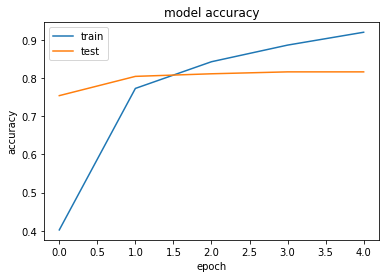

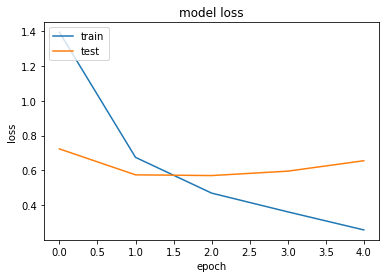

In [ ]:
#  "Accuracy"
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
_, train_acc = model.evaluate(data.train_x, data.train_y)
_, test_acc = model.evaluate(data.test_x, data.test_y)

print("train acc", train_acc)
print("test acc", test_acc)

107/107 [==============================] - 59s 548ms/step - loss: 0.6559 - acc: 0.8158
train acc 0.9658432006835938
test acc 0.8157972097396851


In [ ]:
y_pred = model.predict(data.test_x).argmax(axis=-1)

In [ ]:
##need to run once more
print(classification_report(data.test_y, y_pred, target_names=classes, digits = 5))

              precision    recall  f1-score   support

     neutral    0.75068   0.86834   0.80523       638
     sadness    0.81790   0.78402   0.80060       676
        fear    0.86626   0.83947   0.85266       679
       anger    0.79111   0.77056   0.78070       693
         joy    0.86053   0.82037   0.83997       707

    accuracy                        0.81580      3393
   macro avg    0.81730   0.81655   0.81583      3393
weighted avg    0.81835   0.81580   0.81603      3393



In [ ]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    '''
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    '''
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    fig, ax = plt.subplots()
    
    # Set size
    fig.set_size_inches(12.5, 7.5)
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.grid(False)
    
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

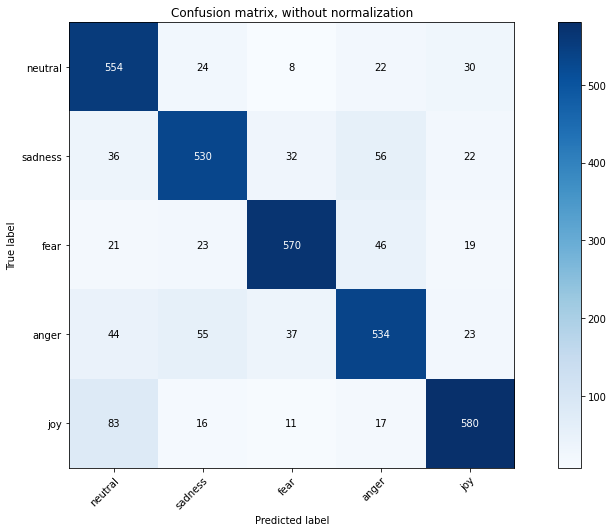

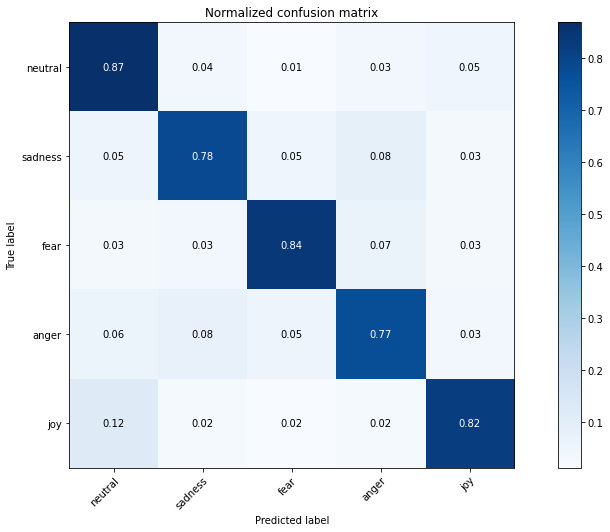

In [ ]:
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plot_confusion_matrix(data.test_y, y_pred, classes=classes,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plot_confusion_matrix(data.test_y, y_pred, classes=classes, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [ ]:
import time
sentences = ["I lost my job!"]

pred_tokens = map(tokenizer.tokenize, sentences)
pred_tokens = map(lambda tok: ["[CLS]"] + tok + ["[SEP]"], pred_tokens)
pred_token_ids = list(map(tokenizer.convert_tokens_to_ids, pred_tokens))

pred_token_ids = map(lambda tids: tids +[0]*(data.max_seq_len-len(tids)),pred_token_ids)
pred_token_ids = np.array(list(pred_token_ids))
start_time = time.time()
predictions = model.predict(pred_token_ids).argmax(axis=-1)


for text, label in zip(sentences, predictions):
  print('Message: ' + text)
  print('predicted: {} ({:.2f} seconds)'.format(classes[label], (time.time() - start_time)))  

Message: I lost my job!
predicted: anger (0.11 seconds)


In [ ]:
# let's save the predictor for later use
model.save("models/bert_model")

INFO:tensorflow:Assets written to: models/bert_model/assets


### Hyperparameter tuning

In [ ]:
# We’ll use Adam with a slightly different learning rate
# Use sparse categorical crossentropy, so we don’t have to one-hot encode our labels.
model.compile(
  optimizer=keras.optimizers.Adam(1e-5),
  loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=[keras.metrics.SparseCategoricalAccuracy(name="acc")]
)

In [ ]:
history = model.fit(
  x=data.train_x, 
  y=data.train_y,
  validation_data=(data.test_x,data.test_y),
  batch_size=32,
  shuffle=True,
  epochs=5
)

Epoch 1/5
248/248 [==============================] - 516s 2s/step - loss: 1.5796 - acc: 0.3152 - val_loss: 0.7519 - val_acc: 0.7283
Epoch 2/5
248/248 [==============================] - 497s 2s/step - loss: 0.7504 - acc: 0.7383 - val_loss: 0.6133 - val_acc: 0.7943
Epoch 3/5
248/248 [==============================] - 498s 2s/step - loss: 0.5284 - acc: 0.8216 - val_loss: 0.5505 - val_acc: 0.8131
Epoch 4/5
248/248 [==============================] - 496s 2s/step - loss: 0.4256 - acc: 0.8633 - val_loss: 0.5904 - val_acc: 0.8131
Epoch 5/5
248/248 [==============================] - 494s 2s/step - loss: 0.3285 - acc: 0.8936 - val_loss: 0.6352 - val_acc: 0.8187


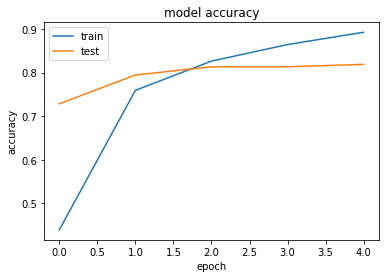

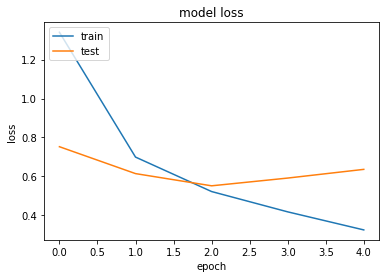

In [ ]:
#  "Accuracy"
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
y_pred = model.predict(data.test_x).argmax(axis=-1)

In [ ]:
print(classification_report(data.test_y, y_pred, target_names=classes, digits = 5))

              precision    recall  f1-score   support

     neutral    0.77279   0.83699   0.80361       638
     sadness    0.81623   0.78846   0.80211       676
        fear    0.84827   0.86451   0.85631       679
       anger    0.79240   0.78211   0.78722       693
         joy    0.86478   0.82320   0.84348       707

    accuracy                        0.81874      3393
   macro avg    0.81889   0.81905   0.81854      3393
weighted avg    0.81972   0.81874   0.81882      3393



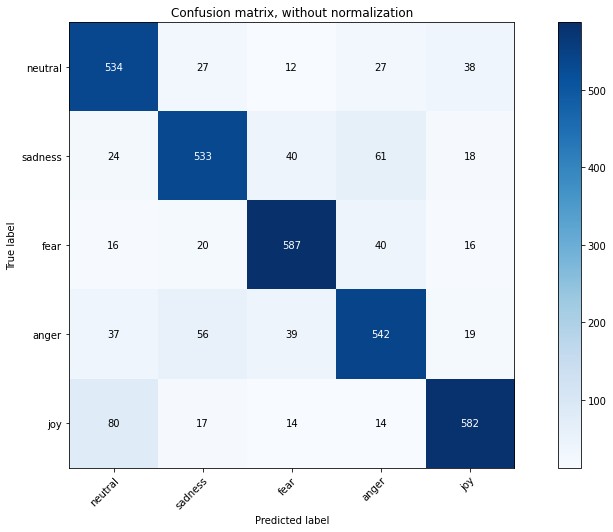

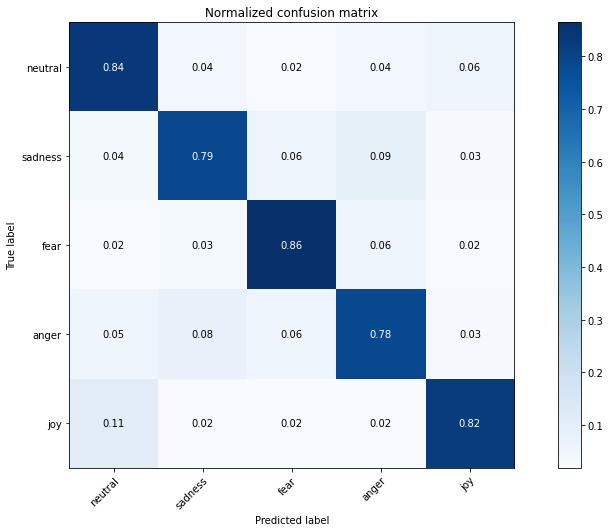

In [ ]:
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plot_confusion_matrix(data.test_y, y_pred, classes=classes,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plot_confusion_matrix(data.test_y, y_pred, classes=classes, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [ ]:
# We’ll use Adam with a slightly different learning rate
# Use sparse categorical crossentropy, so we don’t have to one-hot encode our labels.
model.compile(
  optimizer=keras.optimizers.Adam(2e-5),
  loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=[keras.metrics.SparseCategoricalAccuracy(name="acc")]
)

In [ ]:
history = model.fit(
  x=data.train_x, 
  y=data.train_y,
  validation_data=(data.test_x,data.test_y),
  batch_size=32,
  shuffle=True,
  epochs=5
)

Epoch 1/5
248/248 [==============================] - 523s 2s/step - loss: 1.3868 - acc: 0.4352 - val_loss: 0.6142 - val_acc: 0.7778
Epoch 2/5
248/248 [==============================] - 499s 2s/step - loss: 0.5666 - acc: 0.8113 - val_loss: 0.5457 - val_acc: 0.8114
Epoch 3/5
248/248 [==============================] - 500s 2s/step - loss: 0.3681 - acc: 0.8768 - val_loss: 0.5737 - val_acc: 0.8093
Epoch 4/5
248/248 [==============================] - 503s 2s/step - loss: 0.2675 - acc: 0.9150 - val_loss: 0.6933 - val_acc: 0.8158
Epoch 5/5
248/248 [==============================] - 503s 2s/step - loss: 0.1701 - acc: 0.9489 - val_loss: 0.7440 - val_acc: 0.8167


In [ ]:
y_pred = model.predict(data.test_x).argmax(axis=-1)
print(classification_report(data.test_y, y_pred, target_names=classes, digits = 5))

              precision    recall  f1-score   support

     neutral    0.74595   0.86520   0.80116       638
     sadness    0.83845   0.76775   0.80154       676
        fear    0.88069   0.82622   0.85258       679
       anger    0.77841   0.79076   0.78454       693
         joy    0.85281   0.83593   0.84429       707

    accuracy                        0.81668      3393
   macro avg    0.81926   0.81717   0.81682      3393
weighted avg    0.82024   0.81668   0.81712      3393



In [ ]:
# We’ll use Adam with a slightly different learning rate
# Use sparse categorical crossentropy, so we don’t have to one-hot encode our labels.
model.compile(
  optimizer=keras.optimizers.Adam(2e-5),
  loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=[keras.metrics.SparseCategoricalAccuracy(name="acc")]
)

In [ ]:
history = model.fit(
  x=data.train_x, 
  y=data.train_y,
  validation_data=(data.test_x,data.test_y),
  batch_size=16,
  shuffle=True,
  epochs=5
)

Epoch 1/5
496/496 [==============================] - 608s 1s/step - loss: 1.3533 - acc: 0.4498 - val_loss: 0.6155 - val_acc: 0.7849
Epoch 2/5
496/496 [==============================] - 585s 1s/step - loss: 0.5503 - acc: 0.8163 - val_loss: 0.6224 - val_acc: 0.8014
Epoch 3/5
496/496 [==============================] - 586s 1s/step - loss: 0.3489 - acc: 0.8827 - val_loss: 0.6069 - val_acc: 0.8128
Epoch 4/5
496/496 [==============================] - 586s 1s/step - loss: 0.2336 - acc: 0.9292 - val_loss: 0.7635 - val_acc: 0.8102
Epoch 5/5
496/496 [==============================] - 586s 1s/step - loss: 0.1600 - acc: 0.9512 - val_loss: 0.8407 - val_acc: 0.8111


In [ ]:
y_pred = model.predict(data.test_x).argmax(axis=-1)
print(classification_report(data.test_y, y_pred, target_names=classes, digits = 5))

              precision    recall  f1-score   support

     neutral    0.72266   0.86991   0.78947       638
     sadness    0.82857   0.77219   0.79939       676
        fear    0.86983   0.83652   0.85285       679
       anger    0.79604   0.75469   0.77481       693
         joy    0.85255   0.82603   0.83908       707

    accuracy                        0.81108      3393
   macro avg    0.81393   0.81187   0.81112      3393
weighted avg    0.81527   0.81108   0.81147      3393



In [ ]:
# We’ll use Adam with a slightly different learning rate
# Use sparse categorical crossentropy, so we don’t have to one-hot encode our labels.
model.compile(
  optimizer=keras.optimizers.Adam(5e-5),
  loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=[keras.metrics.SparseCategoricalAccuracy(name="acc")]
)

In [ ]:
history = model.fit(
  x=data.train_x, 
  y=data.train_y,
  validation_data=(data.test_x,data.test_y),
  batch_size=32,
  shuffle=True,
  epochs=5
)

Epoch 1/5
248/248 [==============================] - 499s 2s/step - loss: 1.3813 - acc: 0.4155 - val_loss: 0.6758 - val_acc: 0.7669
Epoch 2/5
248/248 [==============================] - 473s 2s/step - loss: 0.5090 - acc: 0.8271 - val_loss: 0.5885 - val_acc: 0.8149
Epoch 3/5
248/248 [==============================] - 474s 2s/step - loss: 0.2880 - acc: 0.9099 - val_loss: 0.6296 - val_acc: 0.8084
Epoch 4/5
248/248 [==============================] - 474s 2s/step - loss: 0.1669 - acc: 0.9502 - val_loss: 0.8847 - val_acc: 0.8075
Epoch 5/5
248/248 [==============================] - 472s 2s/step - loss: 0.1228 - acc: 0.9643 - val_loss: 0.9237 - val_acc: 0.7987


In [ ]:
y_pred = model.predict(data.test_x).argmax(axis=-1)
print(classification_report(data.test_y, y_pred, target_names=classes, digits = 5))

              precision    recall  f1-score   support

     neutral    0.75362   0.81505   0.78313       638
     sadness    0.70702   0.86391   0.77763       676
        fear    0.88394   0.81885   0.85015       679
       anger    0.79560   0.73016   0.76147       693
         joy    0.88889   0.76945   0.82487       707

    accuracy                        0.79870      3393
   macro avg    0.80581   0.79948   0.79945      3393
weighted avg    0.80718   0.79870   0.79972      3393



In [ ]:
# We’ll use Adam with a slightly different learning rate
# Use sparse categorical crossentropy, so we don’t have to one-hot encode our labels.
model.compile(
  optimizer=keras.optimizers.Adam(3e-5),
  loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=[keras.metrics.SparseCategoricalAccuracy(name="acc")]
)

In [ ]:
history = model.fit(
  x=data.train_x, 
  y=data.train_y,
  validation_data=(data.test_x,data.test_y),
  batch_size=32,
  shuffle=True,
  epochs=5
)

Epoch 1/5
248/248 [==============================] - 496s 2s/step - loss: 1.3208 - acc: 0.4693 - val_loss: 0.5999 - val_acc: 0.7793
Epoch 2/5
248/248 [==============================] - 472s 2s/step - loss: 0.5219 - acc: 0.8287 - val_loss: 0.5482 - val_acc: 0.8134
Epoch 3/5
248/248 [==============================] - 474s 2s/step - loss: 0.3165 - acc: 0.8968 - val_loss: 0.6176 - val_acc: 0.8155
Epoch 4/5
248/248 [==============================] - 473s 2s/step - loss: 0.2012 - acc: 0.9361 - val_loss: 0.7233 - val_acc: 0.8146
Epoch 5/5
248/248 [==============================] - 470s 2s/step - loss: 0.1328 - acc: 0.9605 - val_loss: 0.8051 - val_acc: 0.8170


In [ ]:
y_pred = model.predict(data.test_x).argmax(axis=-1)
print(classification_report(data.test_y, y_pred, target_names=classes, digits = 5))

              precision    recall  f1-score   support

     neutral    0.76177   0.86207   0.80882       638
     sadness    0.85057   0.76627   0.80623       676
        fear    0.86039   0.83505   0.84753       679
       anger    0.77051   0.79942   0.78470       693
         joy    0.85234   0.82461   0.83825       707

    accuracy                        0.81698      3393
   macro avg    0.81912   0.81749   0.81711      3393
weighted avg    0.81986   0.81698   0.81726      3393

